In [5]:
import numpy as np
import pandas as pd
import matplotlib
import math
matplotlib.use('Agg')
import matplotlib.pyplot as plt
#%matplotlib inline

In [6]:
mouse_list = ["","1","2","3","4","5","6"]

phase_list=["A1","A2","A31","A32","A41","A42","A5","A6","A7"]

mouse = mouse_list[6]

phase=phase_list[7]

file = 'ID138464-%s_%s_conv.csv' % (mouse,phase)

df = pd.read_csv(file, header=0)

In [7]:
df["session"]=0

ses=df.columns.get_loc('session')

for i in range(1,df.shape[0]):
    
    if (df.iloc[i].loc["FZ"]!=df.iloc[i-1].loc["FZ"]):
        
        df.iloc[i,ses]= df.iloc[i-1,ses]+1
    
    else:
        
        df.iloc[i,ses]= df.iloc[i-1,ses]

df['mconseq']=0

FZ_col=df.columns.get_loc('FZ')
session_col=df.columns.get_loc('session')
conseqFZ_col=df.columns.get_loc('conseqFZ')
mconseq_col=df.columns.get_loc('mconseq')
Slice_col=df.columns.get_loc('Slice')

for i in range (0,df.shape[0]):
    
    if df.iloc[i,FZ_col] == 0:
        
        ses_no = df.iloc[i,session_col]
        
        if ses_no == df.iloc[df.shape[0]-1].loc['session']:
        
            break;
        
        df_ns=df[df['session']==ses_no+1]
        
        df_ns1=df_ns[df_ns['conseqFZ']==1]
        
        df.iloc[i,mconseq_col]=int(df.iloc[i,Slice_col]-df_ns1.iloc[0,Slice_col]+1)
        
    else:
        
        df.iloc[i,mconseq_col]=df.iloc[i,conseqFZ_col]

In [11]:
Index=np.arange(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1),1)

df_mean=pd.DataFrame(index=Index,columns=[])

for i in range(0,len(df.columns)):
    
    df_mean[df.columns[i]]=-100

for i_n in range(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1)):
    
    i = i_n - int(df.iloc[0].loc['Slice'])
    
    df_mean.iloc[i].loc['Slice']=i_n
    
    dfs = df[df['Slice']==i_n]
    
    for k in range(0,df.columns.get_loc('Time2')+1):
    
        df_mean.iloc[i,k]=dfs.iloc[0,k]
    
    
    for j in range(dfs.columns.get_loc('C000'),dfs.columns.get_loc('C261')+1):
        
        df_mean.iloc[i,j]=dfs[dfs.columns[j]].mean()
        
    for l in range(dfs.columns.get_loc('session'),dfs.columns.get_loc('mconseq')+1):
        
        df_mean.iloc[i,l]=int(dfs.iloc[0,l])

dfmean=df_mean

/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [13]:
Index=np.arange(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1),1)

df_max=pd.DataFrame(index=Index,columns=[])

for i in range(0,len(df.columns)):
    
    df_max[df.columns[i]]=-100
    
for i_n in range(int(df.iloc[0].loc['Slice']),int(df.iloc[df.shape[0]-1].loc['Slice']+1)):
    
    i = i_n - int(df.iloc[0].loc['Slice'])
    
    df_max.iloc[i].loc['Slice']=i_n
    
    dfs = df[df['Slice']==i_n]
    
    for k in range(0,df.columns.get_loc('Time2')+1):
    
        df_max.iloc[i,k]=dfs.iloc[0,k]
    
    
    for j in range(dfs.columns.get_loc('C000'),dfs.columns.get_loc('C261')+1):
        
        df_max.iloc[i,j]=dfs[dfs.columns[j]].max()
        
    for l in range(dfs.columns.get_loc('session'),dfs.columns.get_loc('mconseq')+1):
        
        df_max.iloc[i,l]=int(dfs.iloc[0,l])

dfmax=df_max

/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kanri/anaconda/envs/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [27]:
dfmax[dfmax['mconseq']==1]

Slice      X      Y    AREA   XOR   FZ  conseqFZ  Distance  Tone  Shock  \
25    25.0  213.0  168.0  1298.0  18.0  1.0       1.0       0.3   1.0    0.0   
34    34.0  231.0  181.0  1286.0  13.0  1.0       1.0       0.1   1.0    0.0   
46    46.0  113.0  183.0  1403.0  14.0  1.0       1.0       0.2   1.0    0.0   
48    48.0  111.0  182.0  1424.0   0.0  1.0       1.0       0.0   1.0    0.0   
55    55.0  108.0  183.0  1399.0   5.0  1.0       1.0       0.2   1.0    0.0   
65    65.0  176.0  181.0  1199.0   2.0  1.0       1.0       0.1   1.0    0.0   
71    71.0  169.0  177.0  1335.0   0.0  1.0       1.0       0.1   1.0    0.0   
80    80.0  173.0  177.0  1219.0   0.0  1.0       1.0       0.0   1.0    0.0   
97    97.0  224.0  191.0   980.0  16.0  1.0       1.0       0.2   1.0    0.0   
100  100.0  225.0  191.0  1158.0   3.0  1.0       1.0       0.1   1.0    0.0   
127  127.0  137.0  177.0  1341.0   0.0  1.0       1.0       0.0   1.0    0.0   
138  138.0  136.0  180.0  1280.0  16.0  1.0       1.0       0.1   1.0    0.0   
141  141.0  133.0  179.0  1336.0   0.0  1.0       1.0       0.0   1.0    0.0   
150  150.0  132.0  181.0  1184.0   3.0  1.0       1.0       0.1   1.0    0.0   
165  165.0  129.0  176.0  1317.0   9.0  1.0       1.0       0.0   1.0    0.0   
178  178.0  125.0  176.0  1320.0   0.0  1.0       1.0       0.0   1.0    0.0   
195  195.0   72.0  156.0  1233.0   1.0  1.0       1.0       0.1   1.0    0.0   
223  223.0  159.0  175.0  1260.0   0.0  1.0       1.0       0.0   1.0    0.0   
235  235.0  161.0  174.0  1240.0   5.0  1.0       1.0       0.1   1.0    0.0   
238  238.0  160.0  173.0  1235.0   6.0  1.0       1.0       0.1   1.0    0.0   
248  248.0  160.0  173.0  1227.0   0.0  1.0       1.0       0.0   1.0    0.0   
285  285.0  140.0  180.0  1317.0   0.0  1.0       1.0       0.0   1.0    0.0   
299  299.0   65.0  163.0  1397.0   1.0  1.0       1.0       0.2   1.0    0.0   
316  316.0   53.0  160.0  1289.0   0.0  1.0       1.0       0.1   1.0    0.0   
320  320.0   54.0  166.0  1300.0   0.0  1.0       1.0       0.0   1.0    0.0   
325  325.0   55.0  168.0  1281.0  14.0  1.0       1.0       0.0   1.0    0.0   
330  330.0   58.0  171.0  1168.0   1.0  1.0       1.0       0.1   1.0    0.0   
343  343.0   72.0  178.0  1157.0   0.0  1.0       1.0       0.0   1.0    0.0   
349  349.0   73.0  178.0  1213.0  13.0  1.0       1.0       0.1   1.0    0.0   
368  368.0   73.0  177.0  1143.0   1.0  1.0       1.0       0.1   1.0    0.0   
..     ...    ...    ...     ...   ...  ...       ...       ...   ...    ...   
490  490.0   75.0  173.0  1344.0   0.0  1.0       1.0       0.1   1.0    0.0   
501  501.0   72.0  171.0  1211.0   0.0  1.0       1.0       0.1   1.0    0.0   
544  544.0   73.0  170.0  1201.0   3.0  1.0       1.0       0.0   1.0    0.0   
568  568.0   80.0  163.0  1353.0   4.0  1.0       1.0       0.0   1.0    0.0   
574  574.0   83.0  164.0  1422.0  17.0  1.0       1.0       0.1   1.0    0.0   
577  577.0   85.0  166.0  1449.0  11.0  1.0       1.0       0.1   1.0    0.0   
580  580.0  115.0  183.0  1462.0  10.0  1.0       1.0       0.1   1.0    0.0   
594  594.0   64.0  168.0  1269.0   8.0  1.0       1.0       0.1   1.0    0.0   
597  597.0   63.0  166.0  1194.0   4.0  1.0       1.0       0.3   1.0    0.0   
599  599.0   64.0  167.0  1191.0   0.0  1.0       1.0       0.0   1.0    0.0   
616  616.0   66.0  170.0  1351.0  11.0  1.0       1.0       0.1   1.0    0.0   
631  631.0   57.0  188.0  1251.0   0.0  1.0       1.0       0.1   1.0    0.0   
634  634.0   56.0  187.0  1202.0   0.0  1.0       1.0       0.0   1.0    0.0   
641  641.0   45.0  176.0  1119.0  11.0  1.0       1.0       0.2   1.0    0.0   
663  663.0   36.0  180.0  1190.0  10.0  1.0       1.0       0.2   1.0    0.0   
665  665.0   43.0  183.0   979.0   0.0  1.0       1.0       0.1   1.0    0.0   
685  685.0   46.0  184.0  1077.0   0.0  1.0       1.0       0.1   1.0    0.0   
704  704.0   48.0  185.0  1288.0   2.0  1.0       1.0       0.1   1.0    0.0   
718  

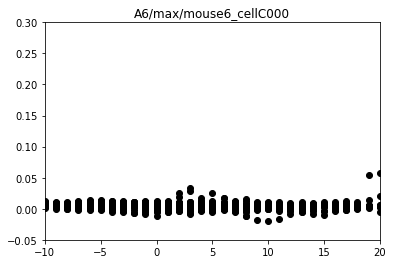

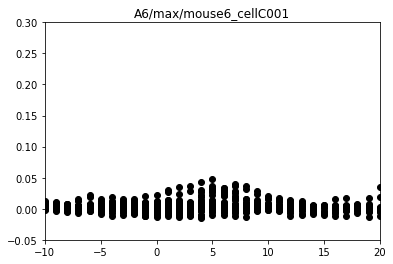

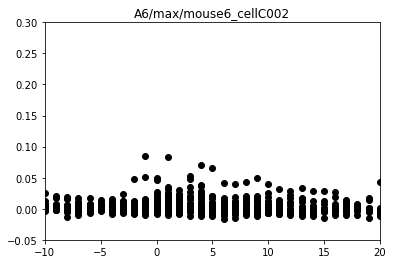

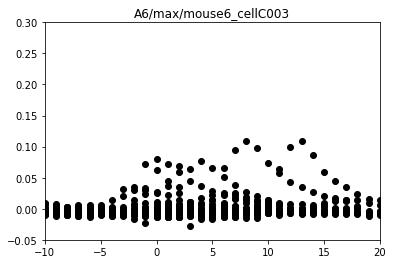

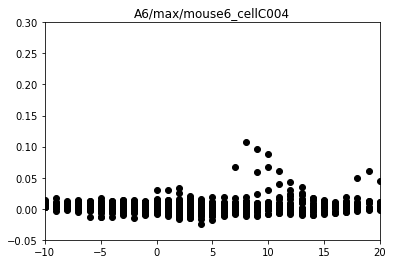

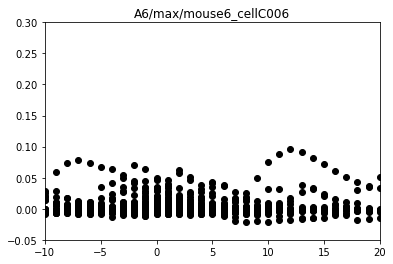

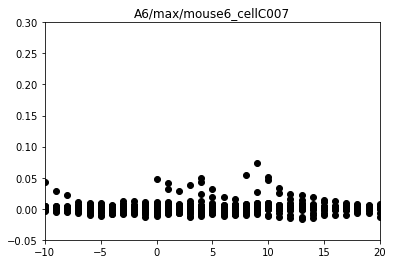

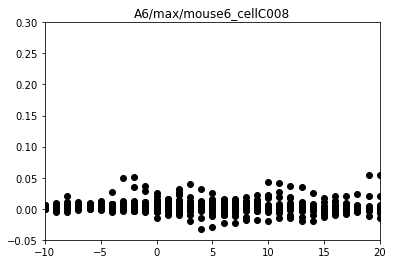

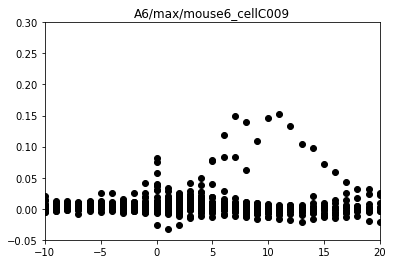

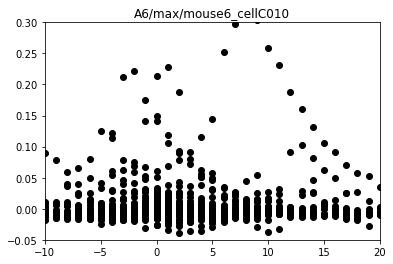

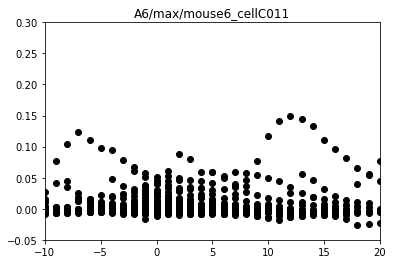

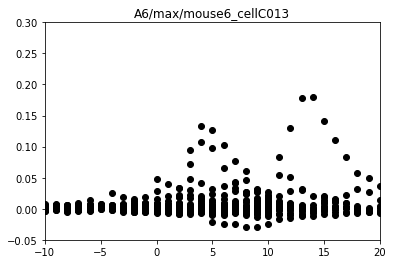

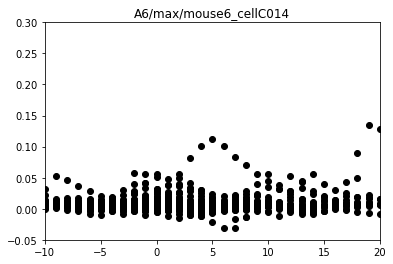

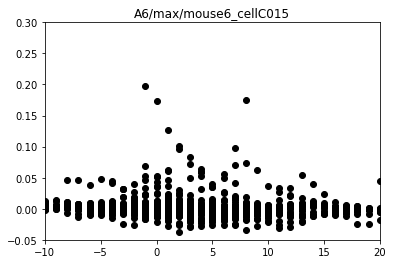

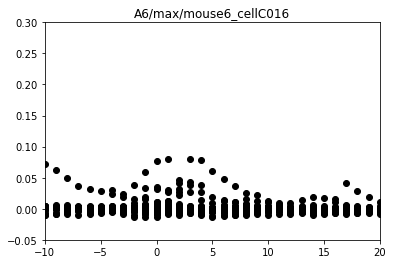

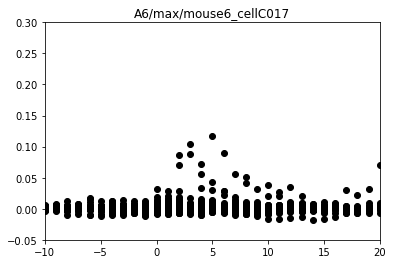

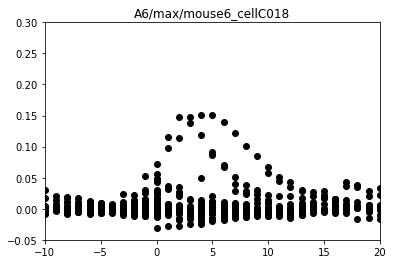

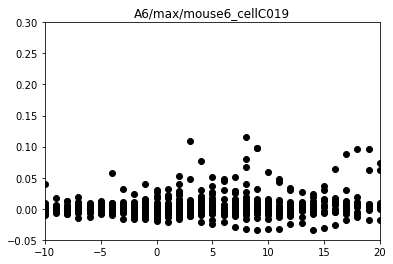

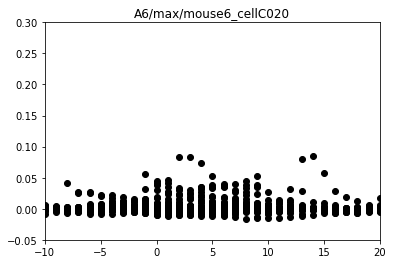

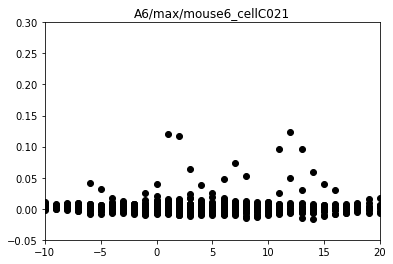

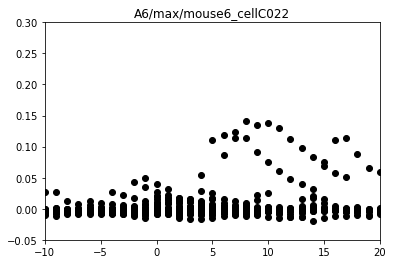

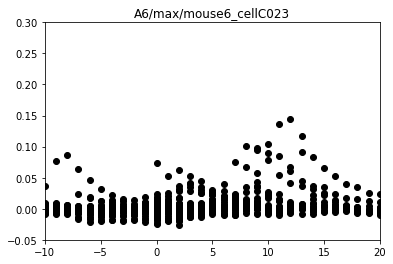

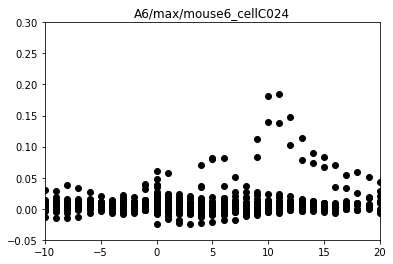

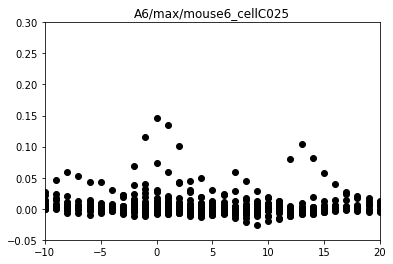

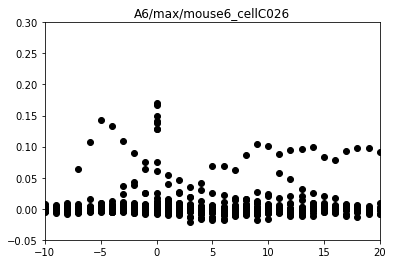

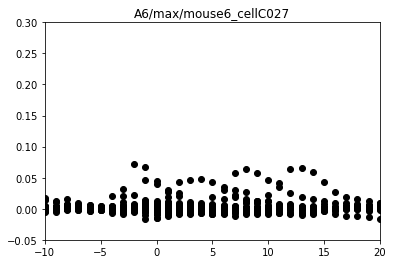

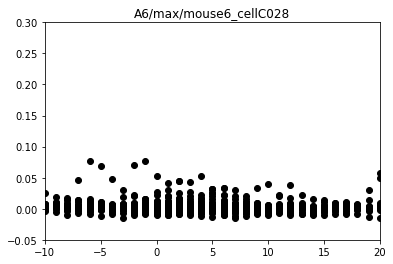

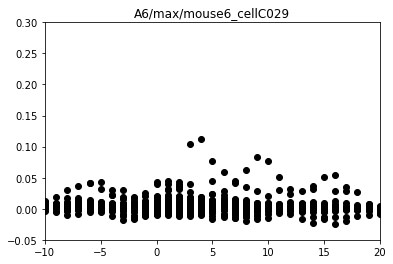

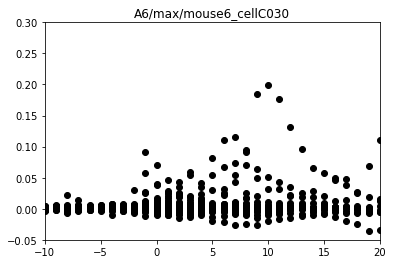

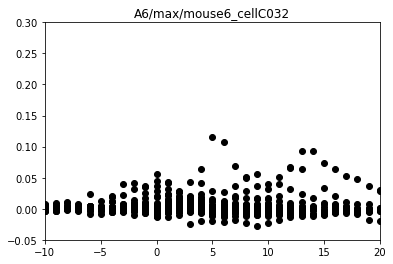

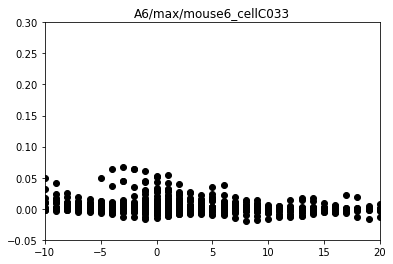

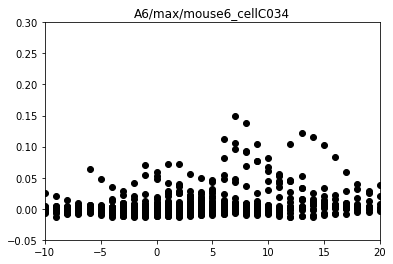

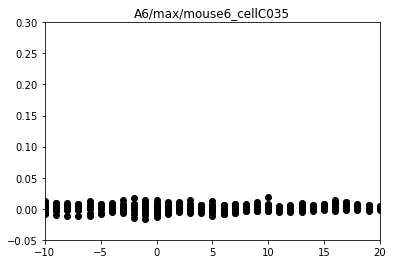

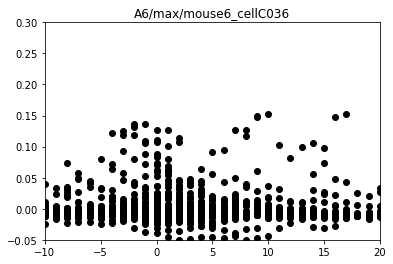

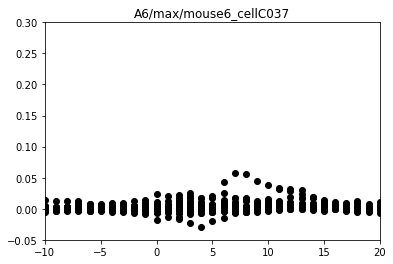

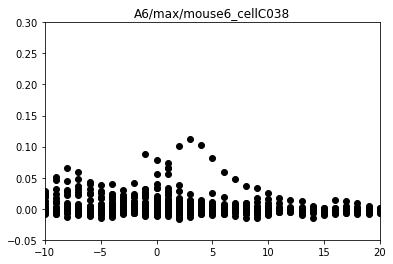

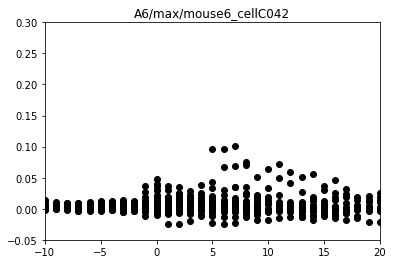

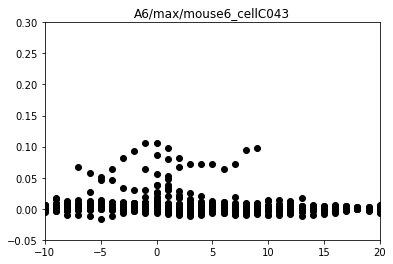

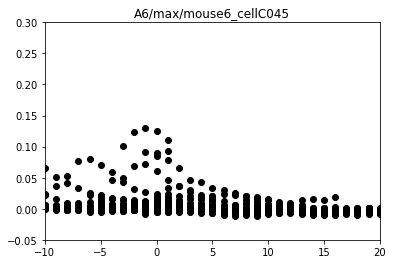

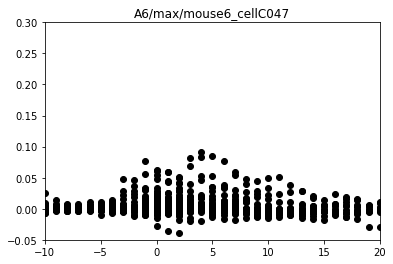

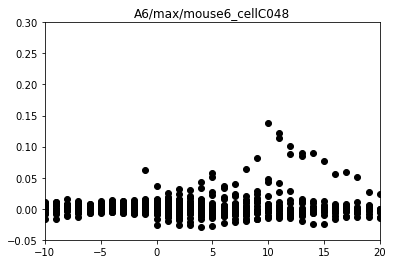

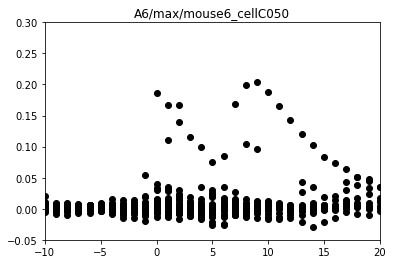

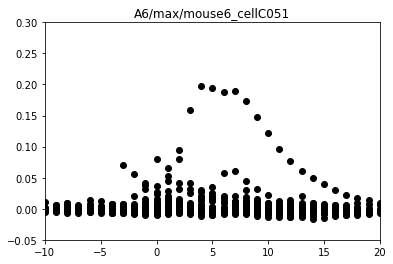

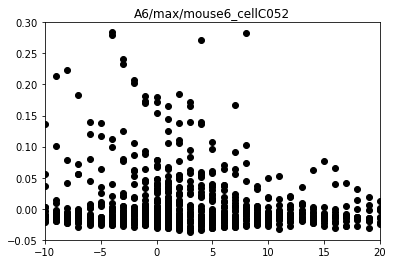

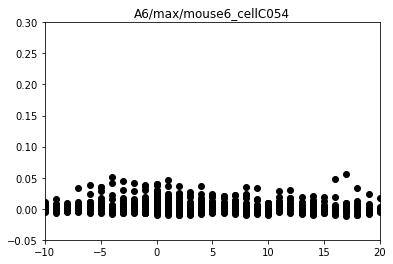

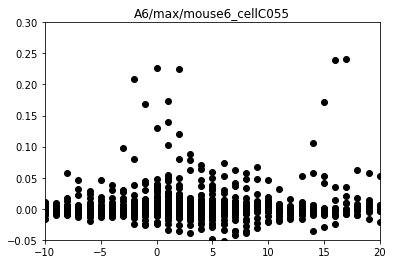

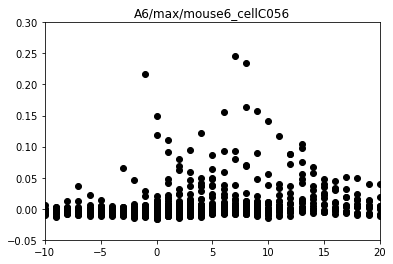

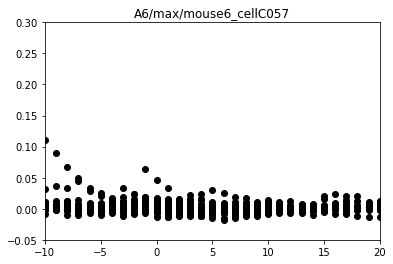

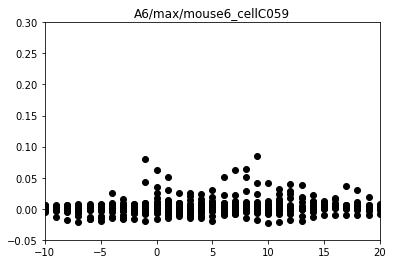

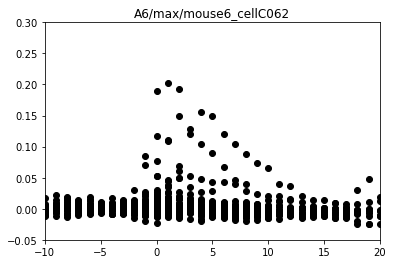

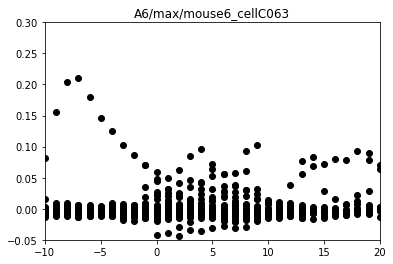

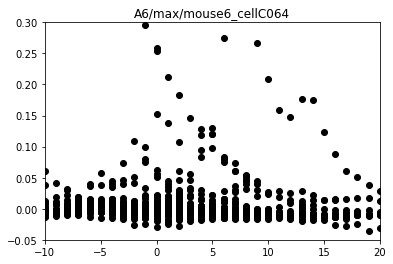

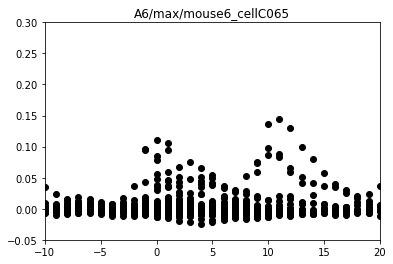

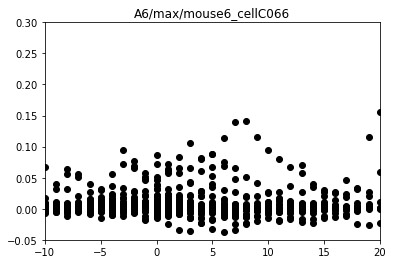

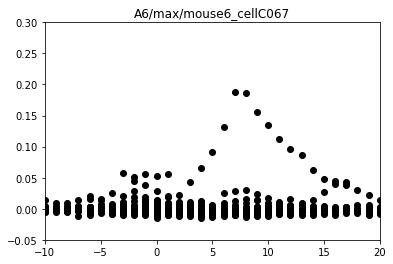

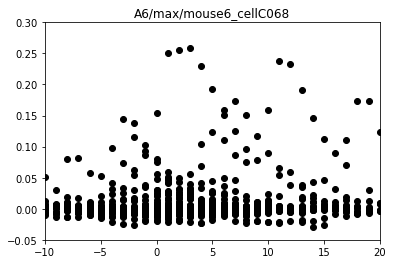

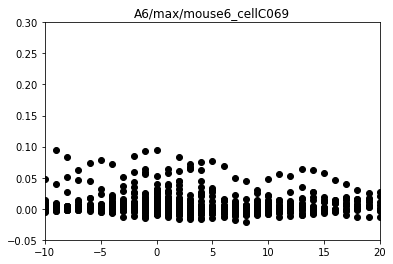

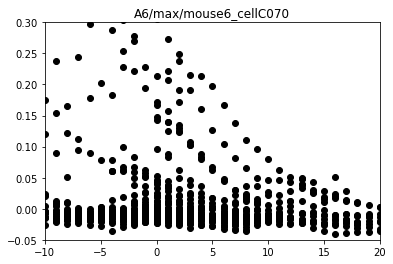

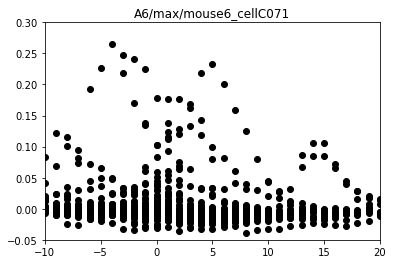

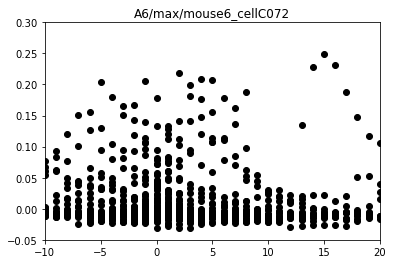

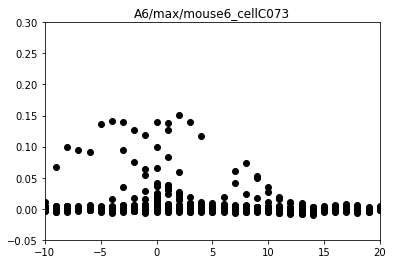

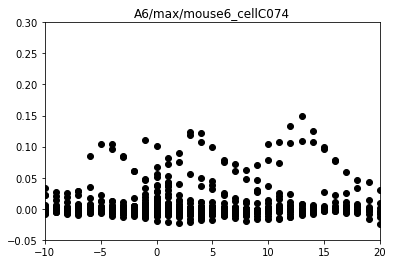

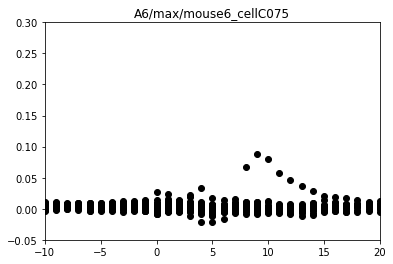

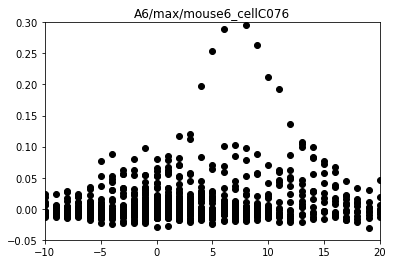

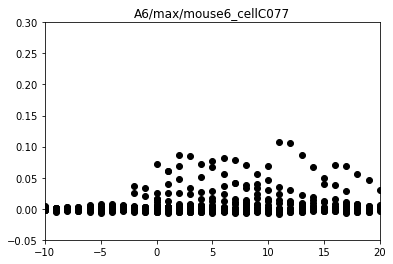

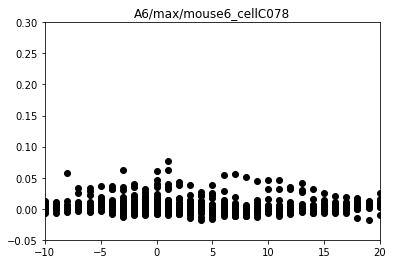

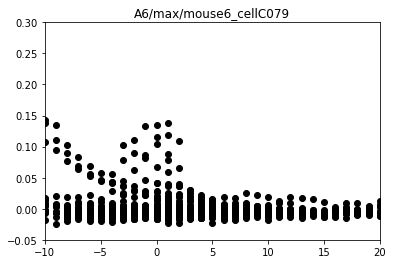

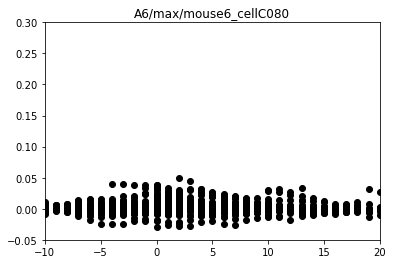

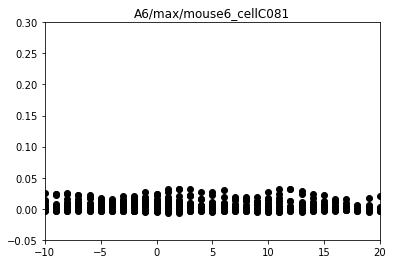

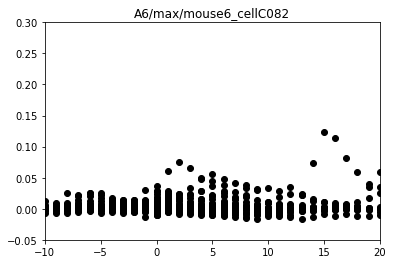

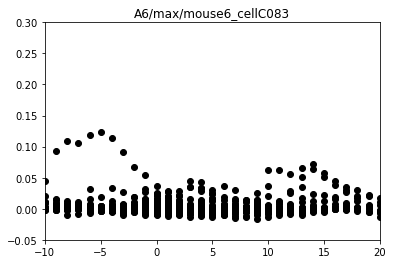

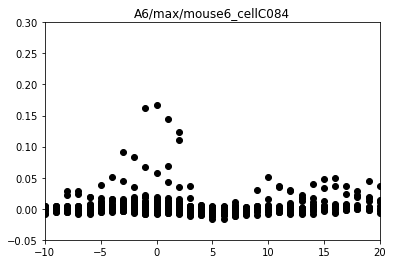

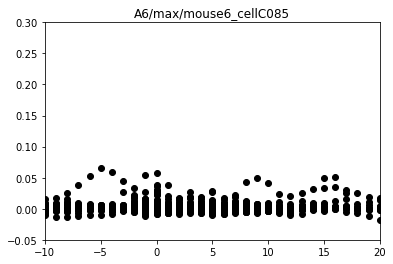

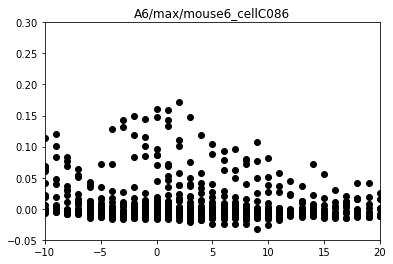

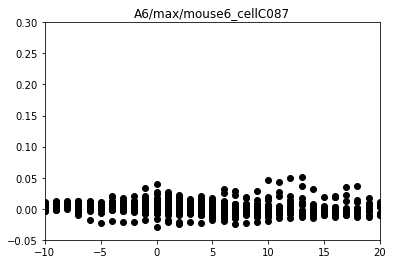

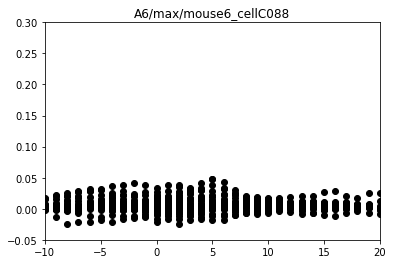

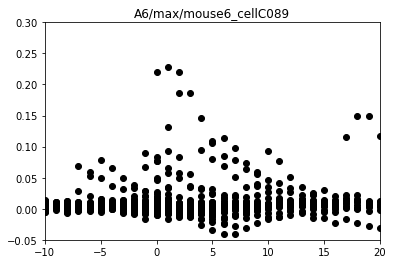

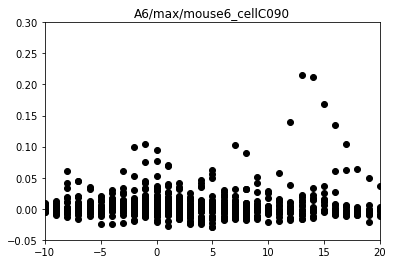

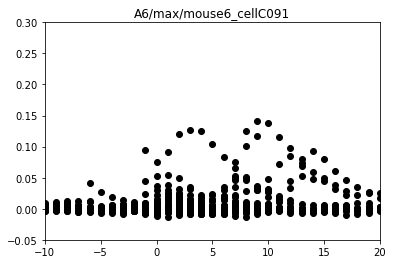

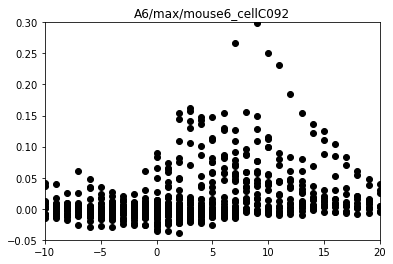

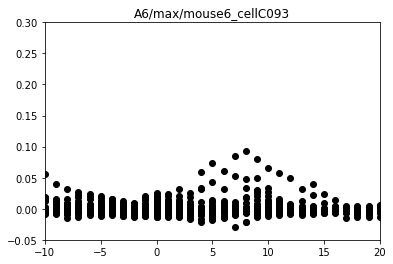

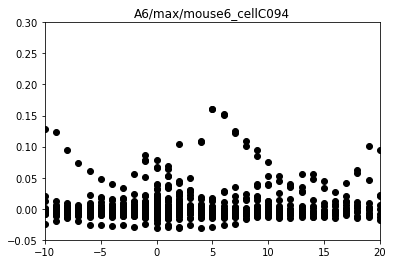

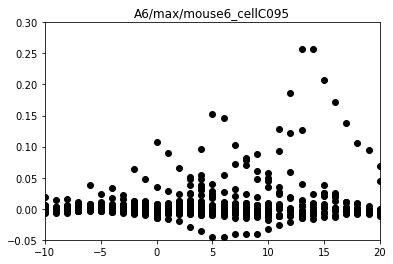

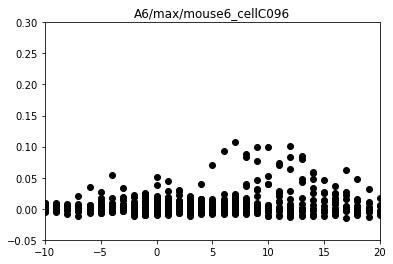

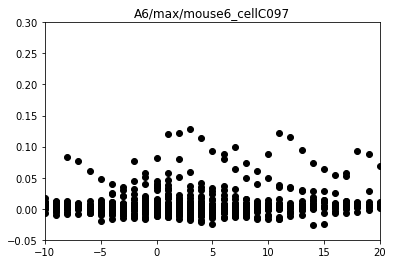

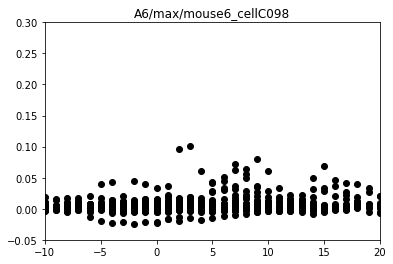

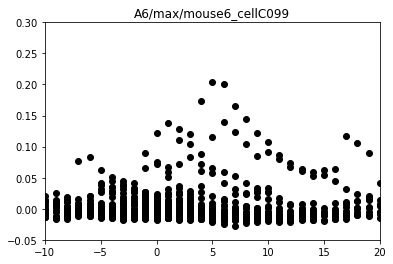

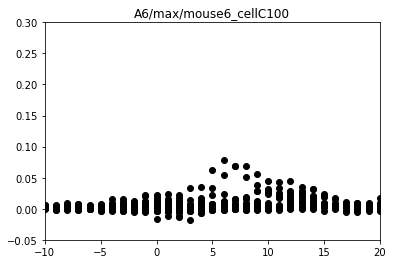

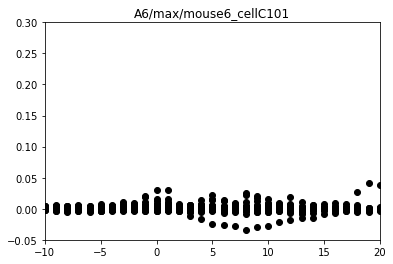

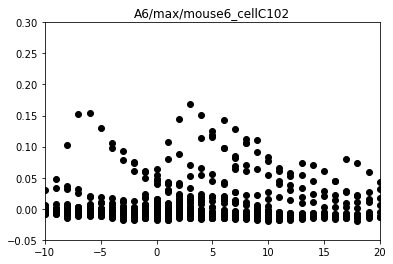

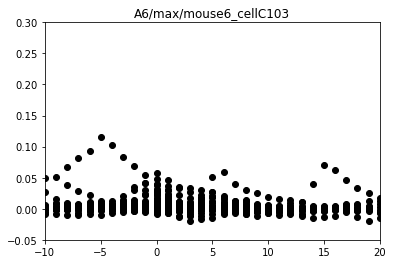

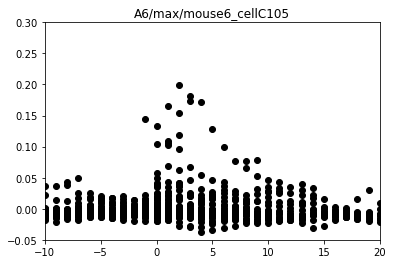

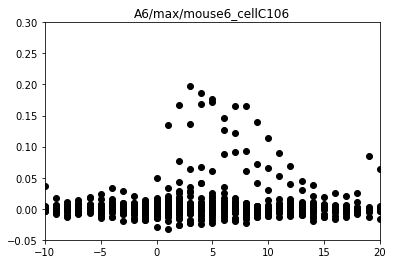

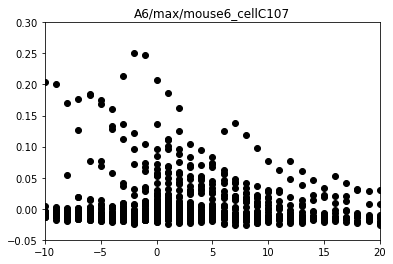

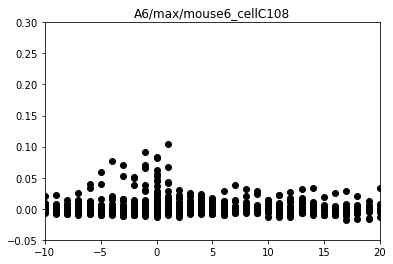

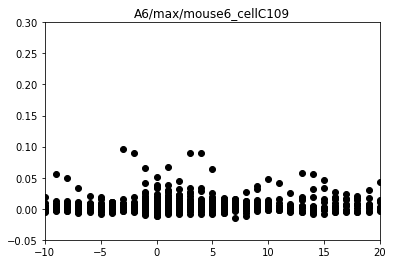

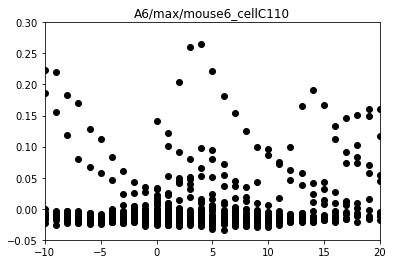

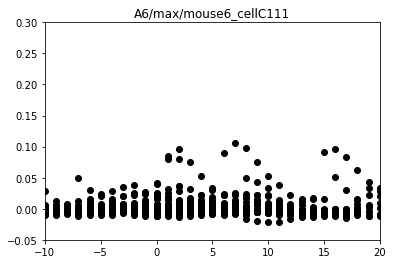

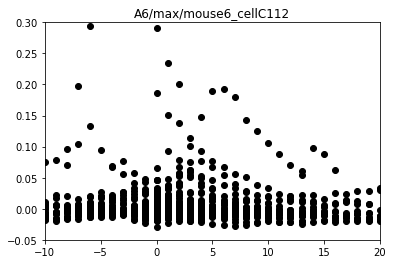

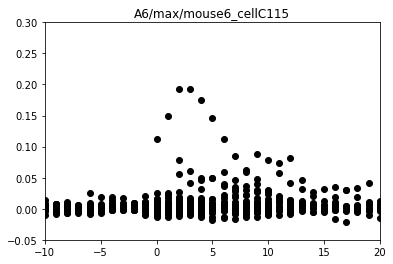

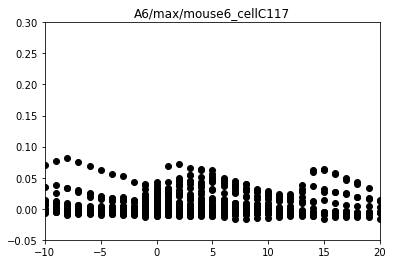

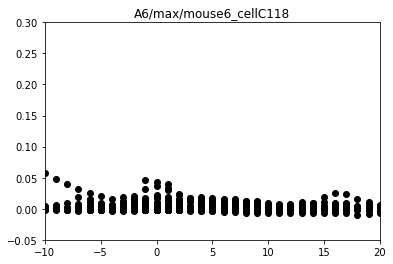

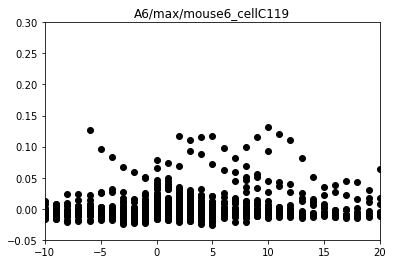

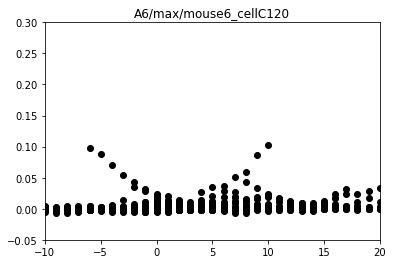

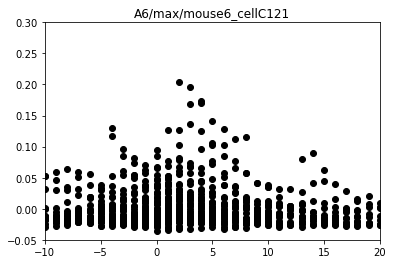

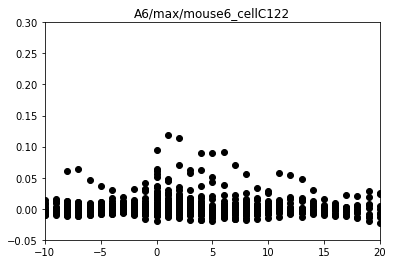

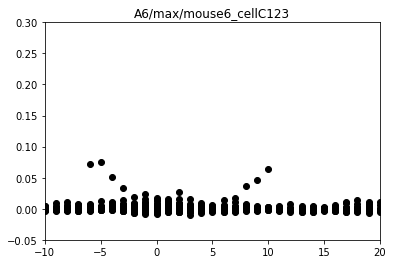

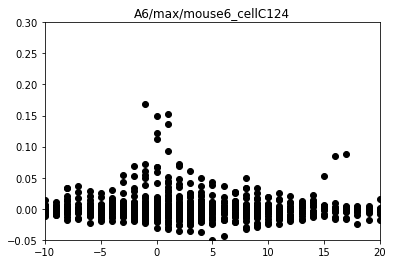

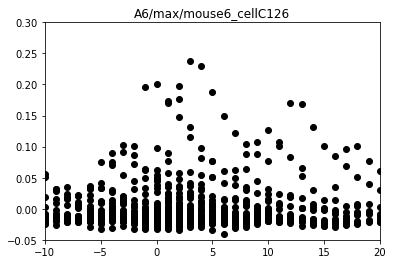

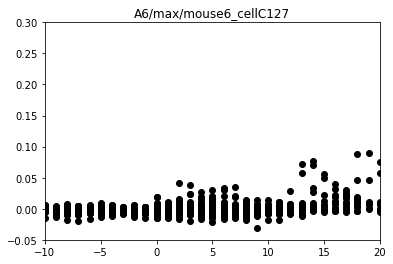

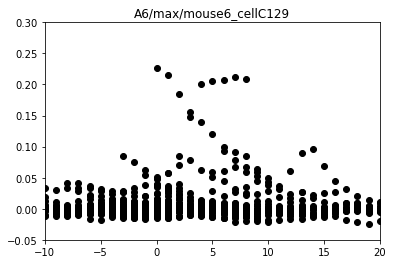

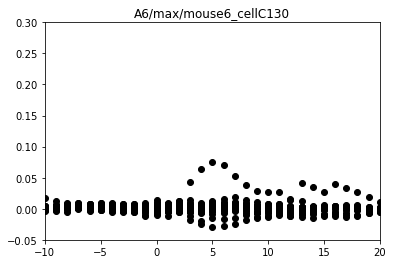

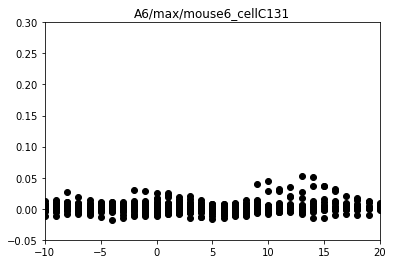

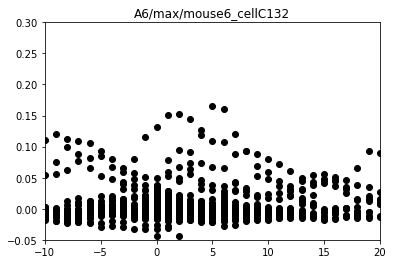

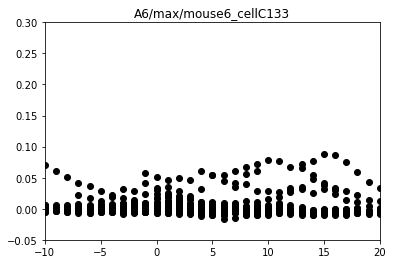

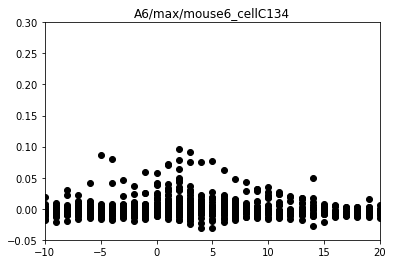

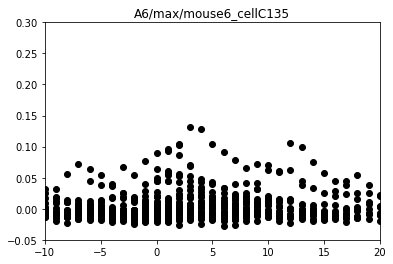

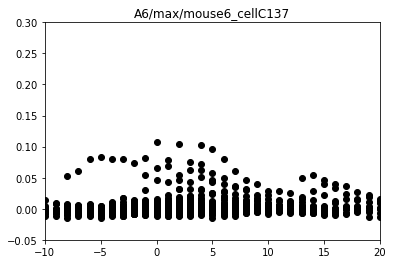

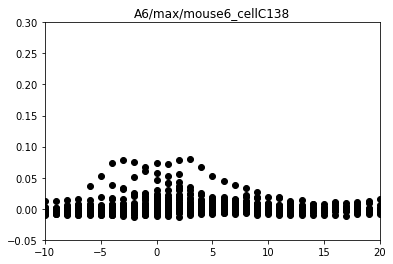

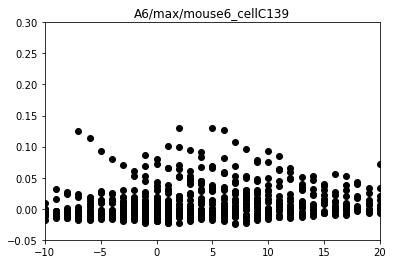

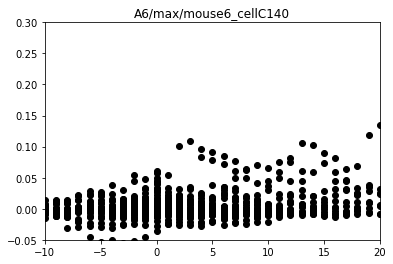

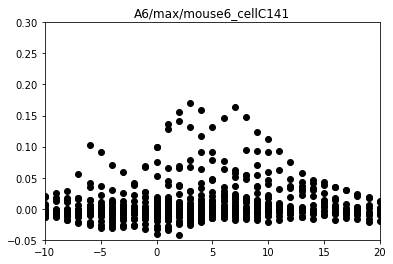

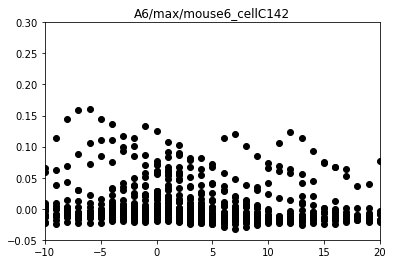

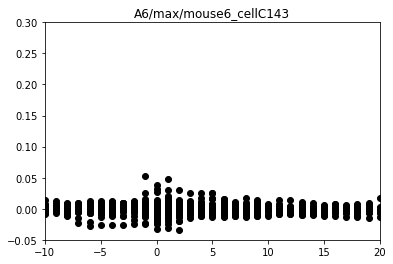

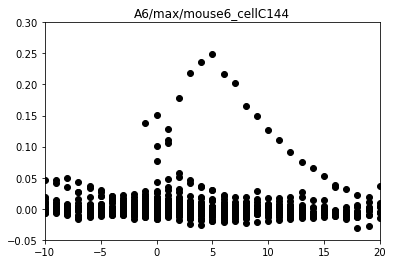

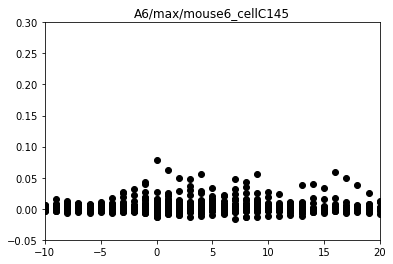

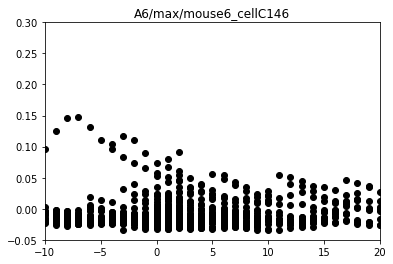

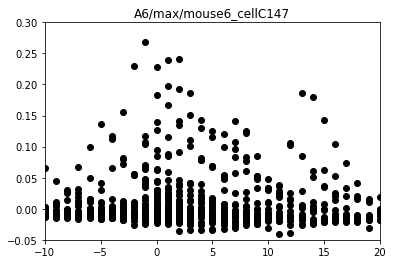

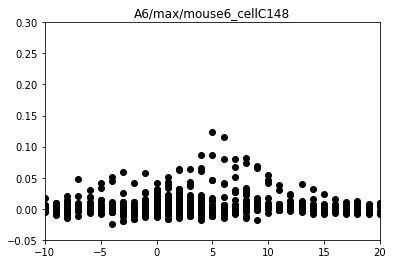

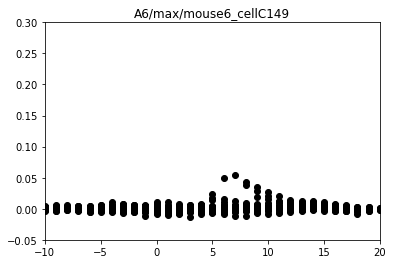

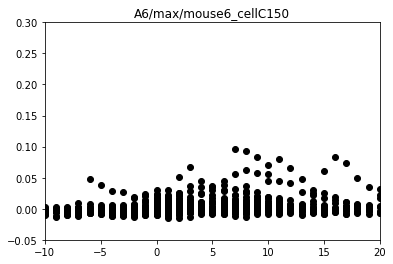

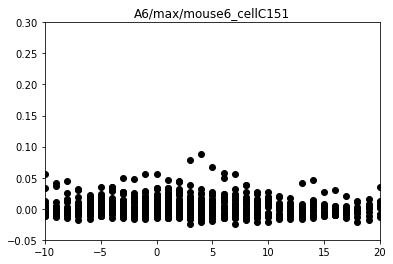

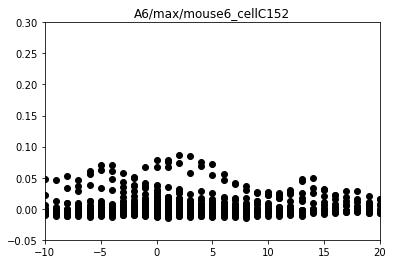

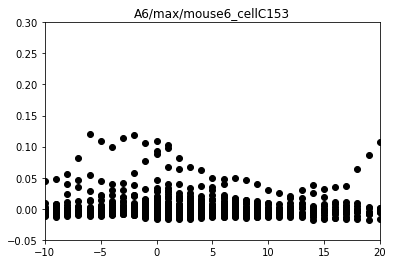

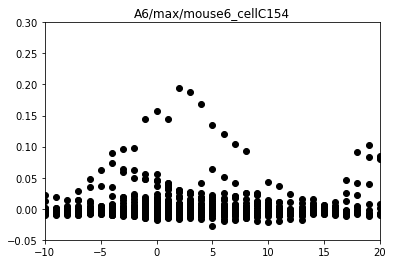

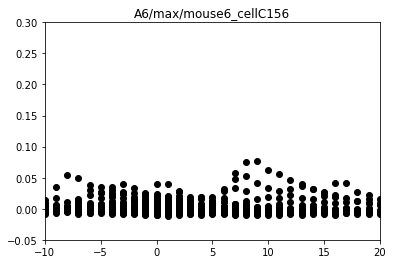

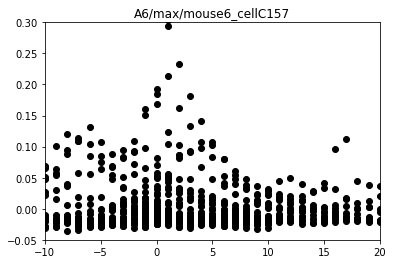

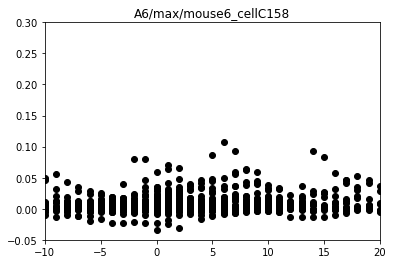

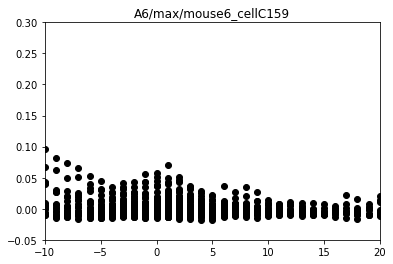

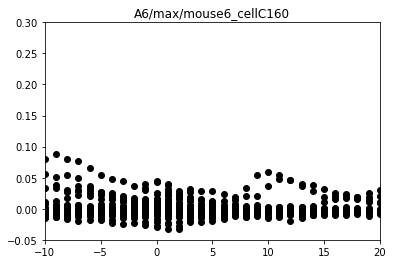

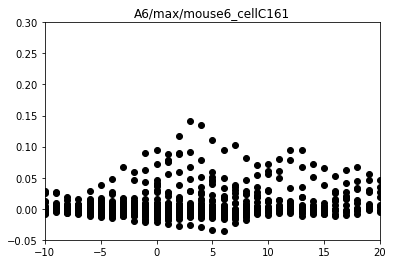

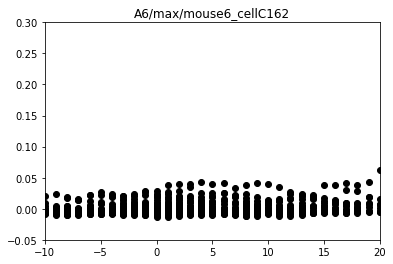

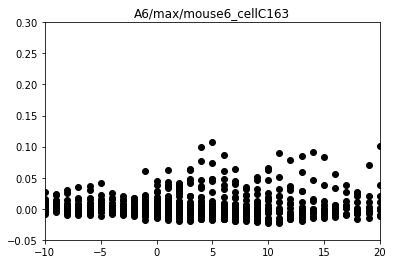

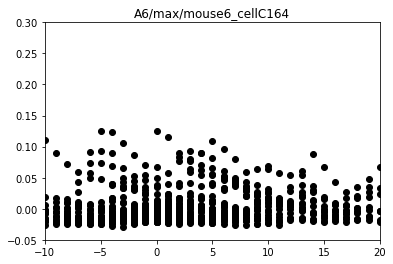

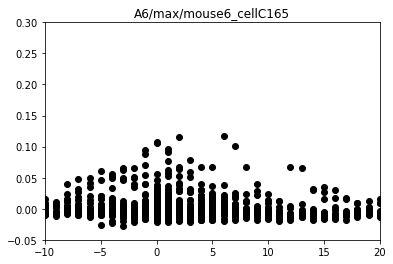

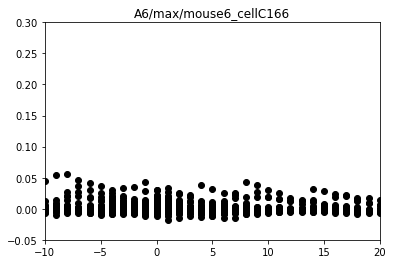

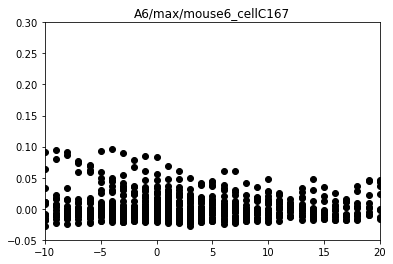

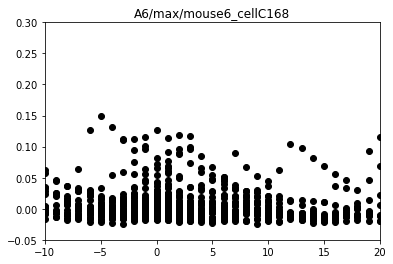

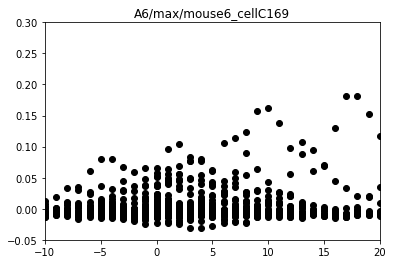

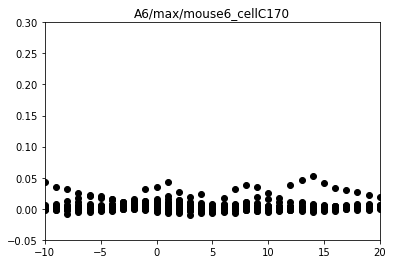

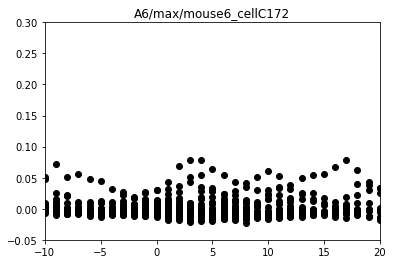

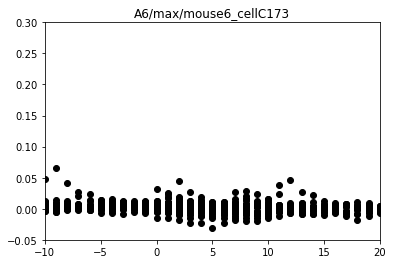

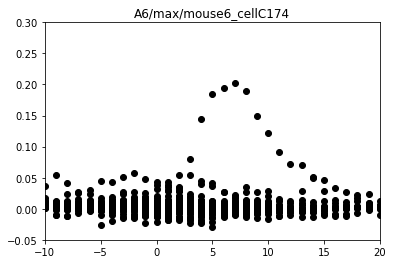

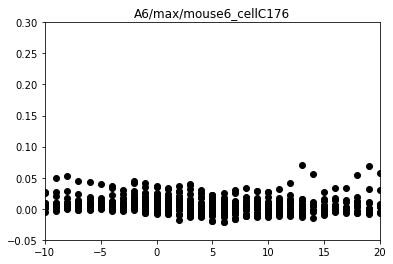

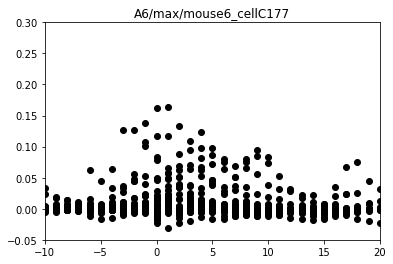

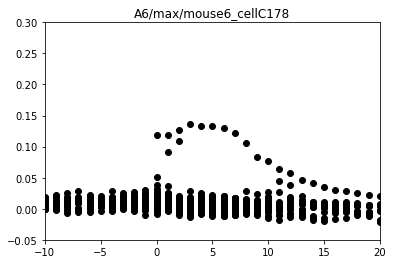

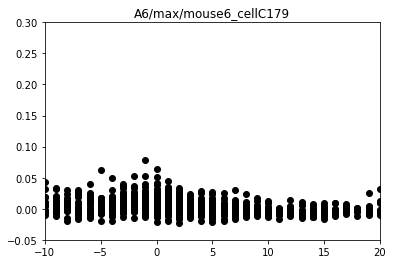

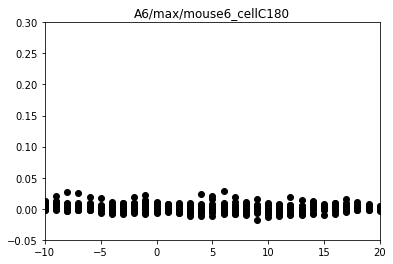

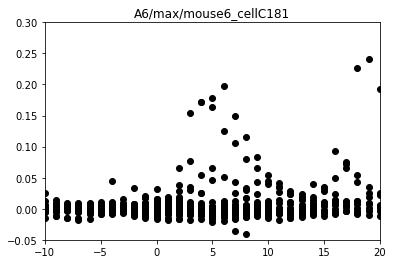

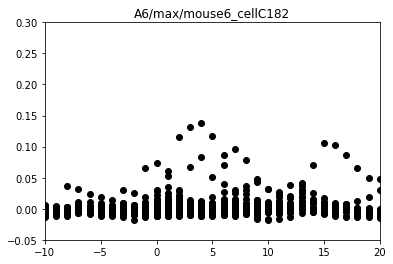

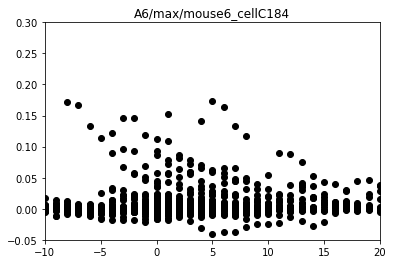

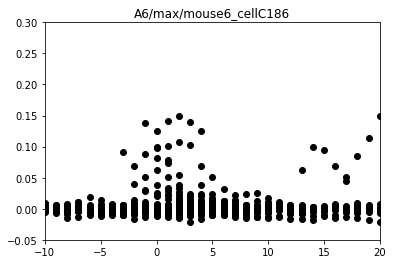

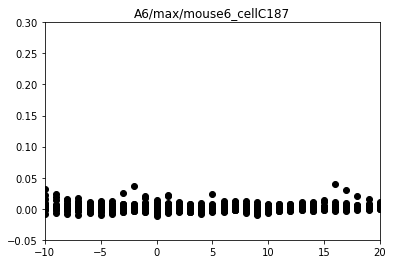

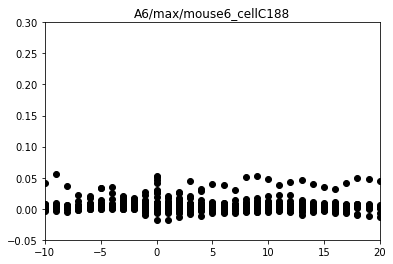

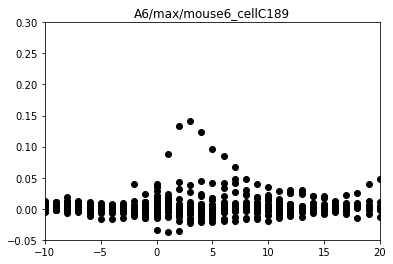

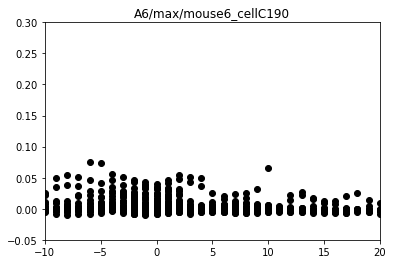

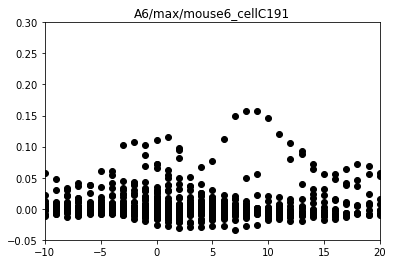

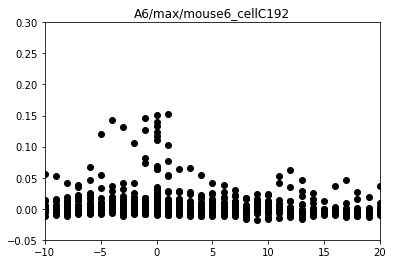

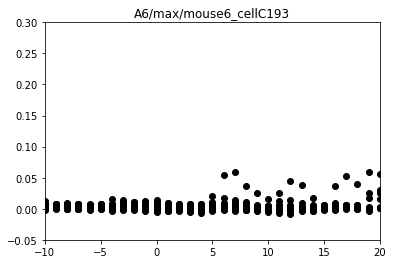

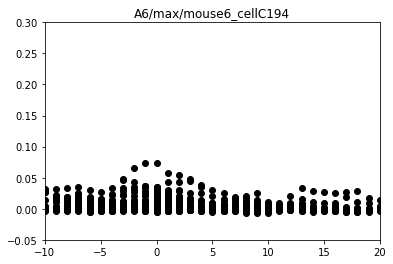

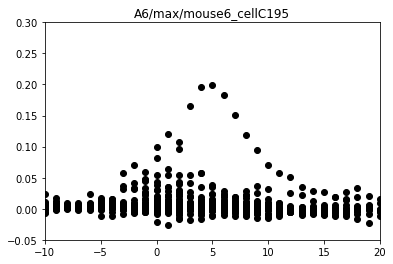

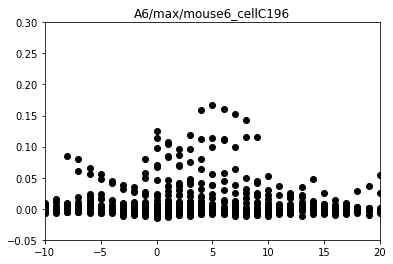

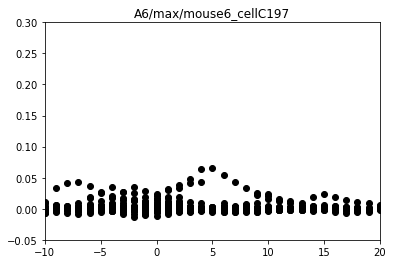

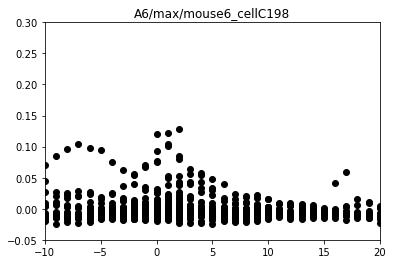

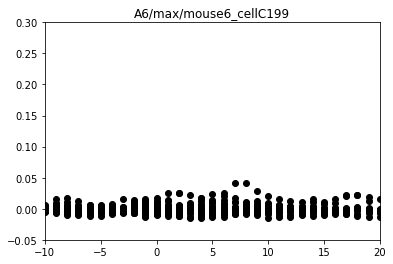

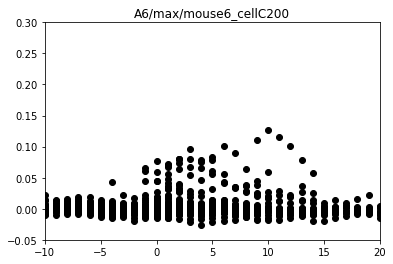

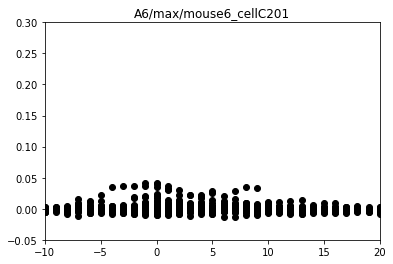

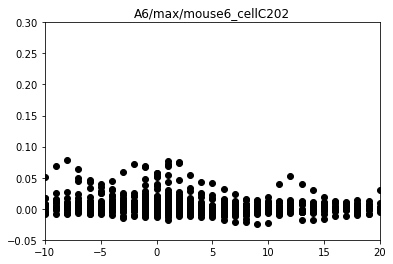

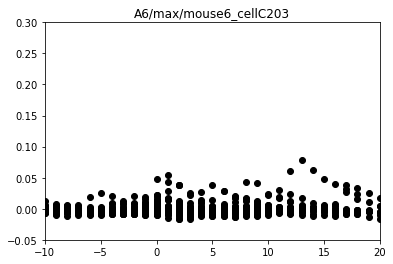

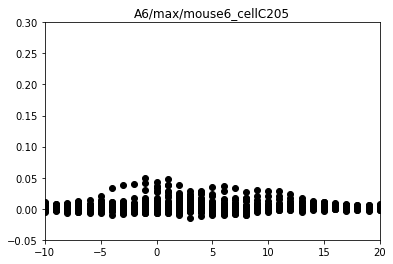

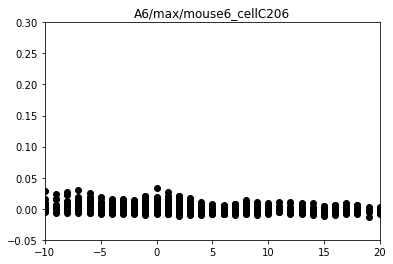

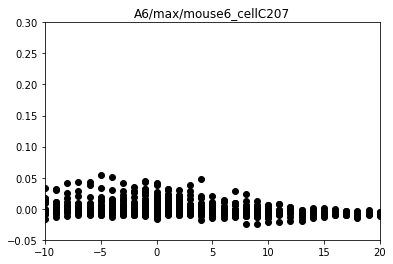

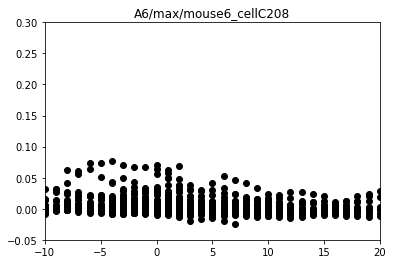

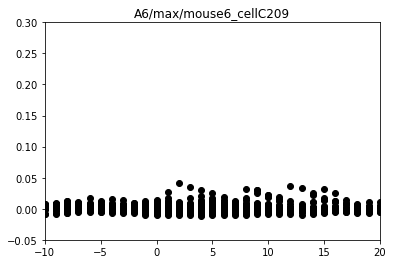

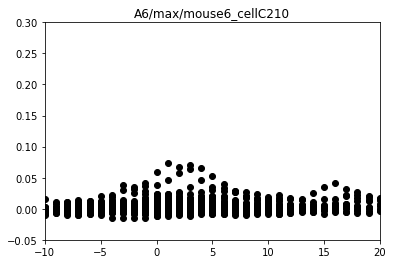

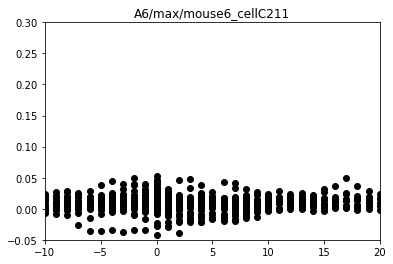

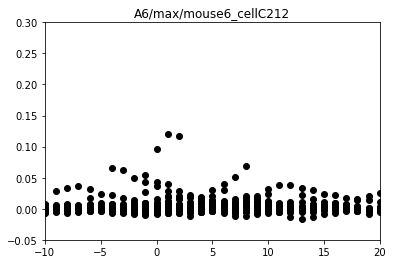

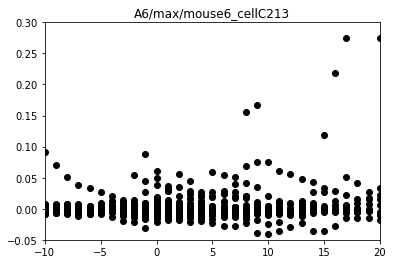

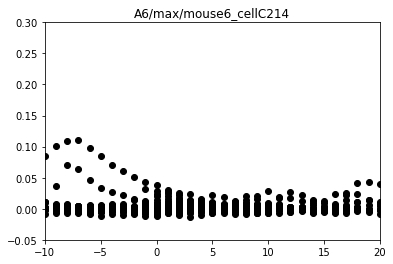

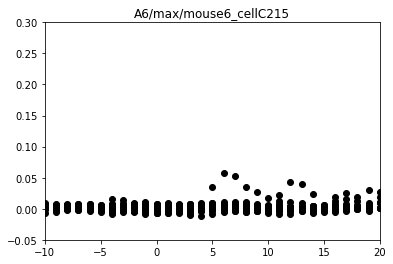

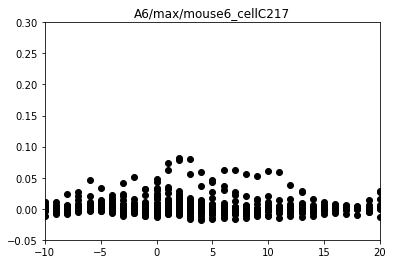

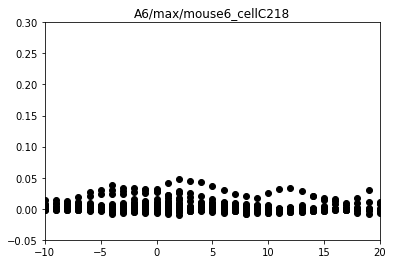

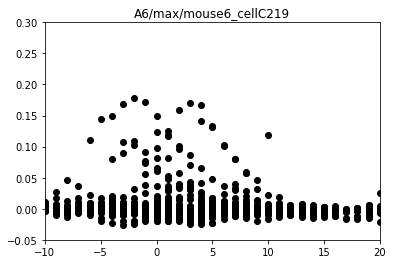

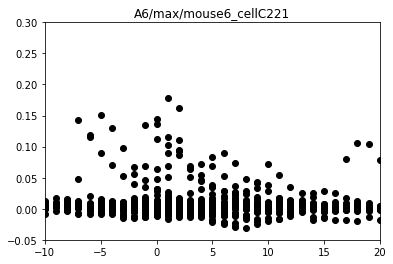

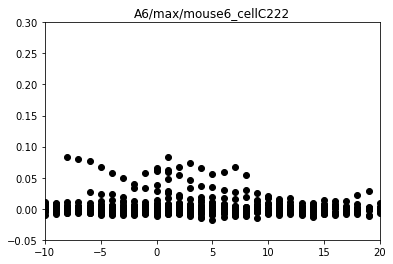

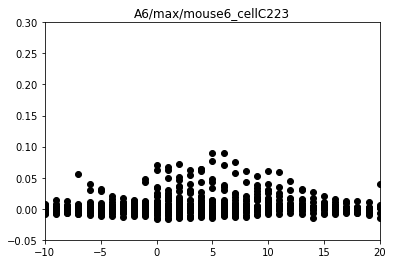

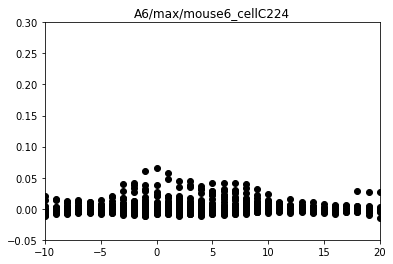

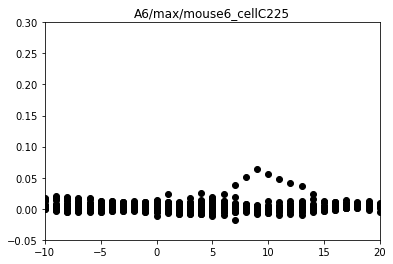

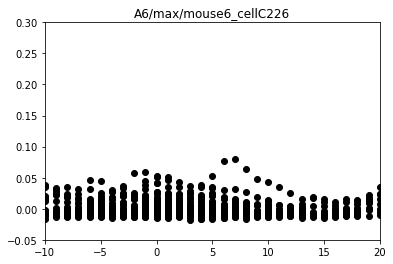

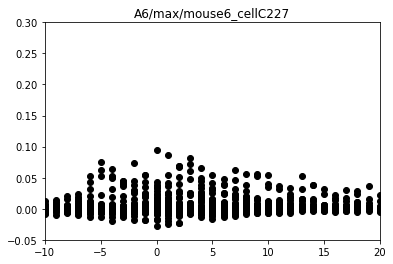

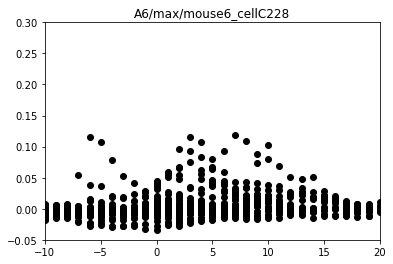

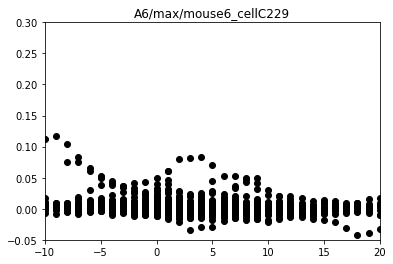

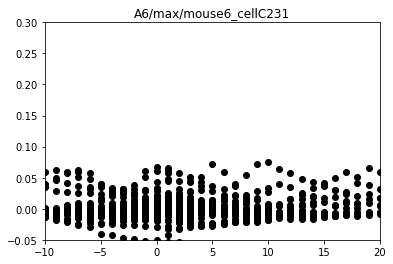

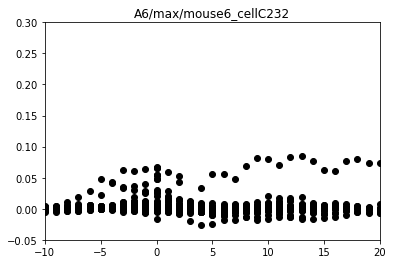

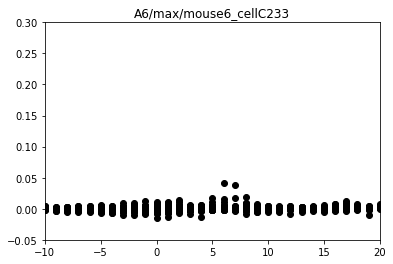

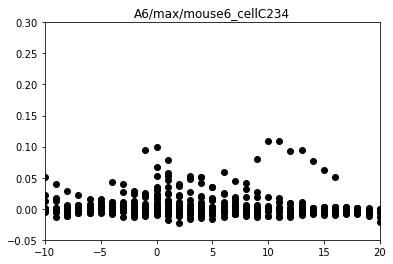

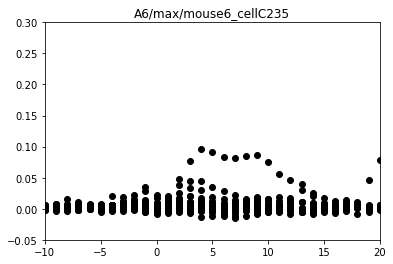

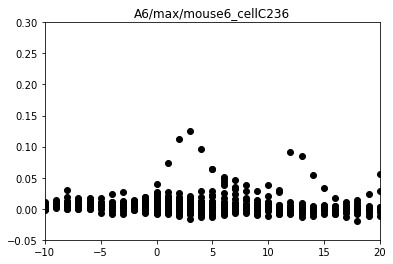

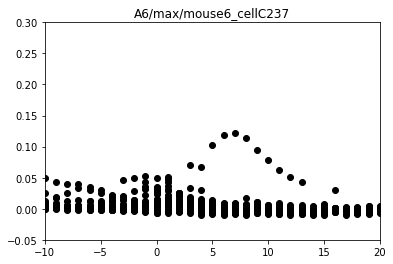

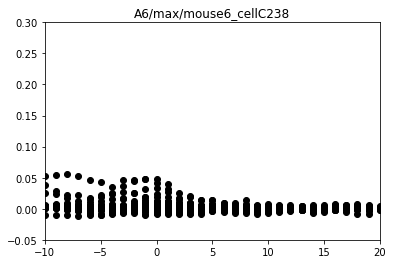

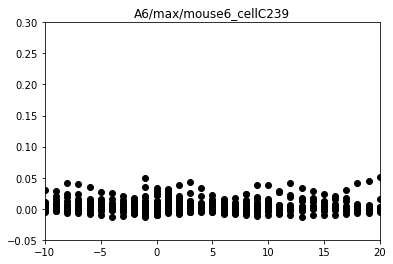

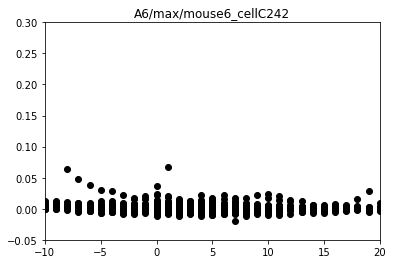

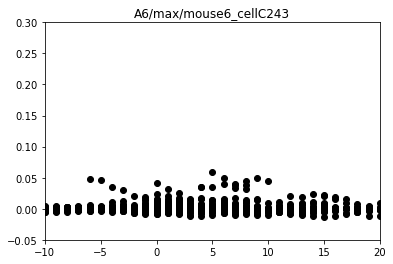

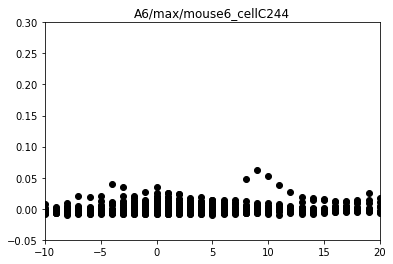

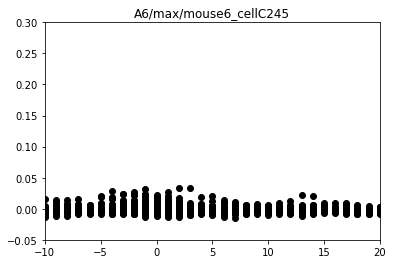

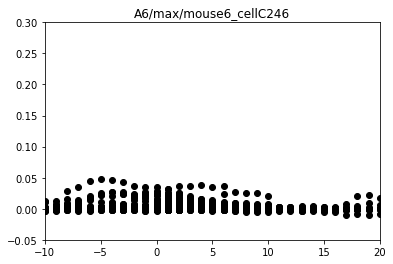

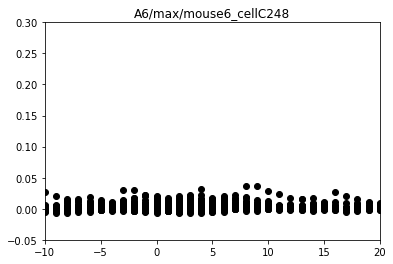

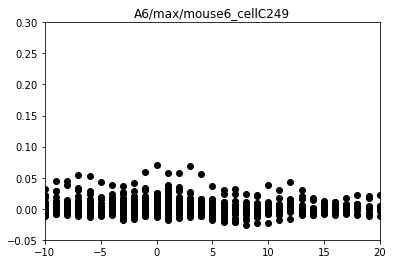

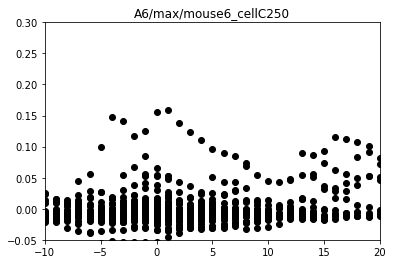

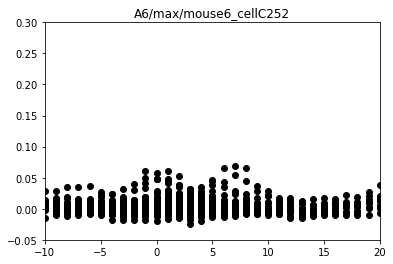

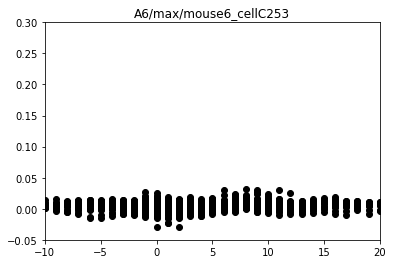

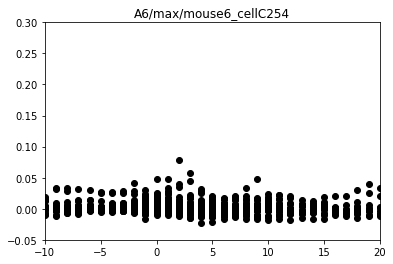

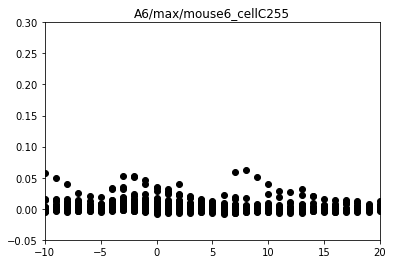

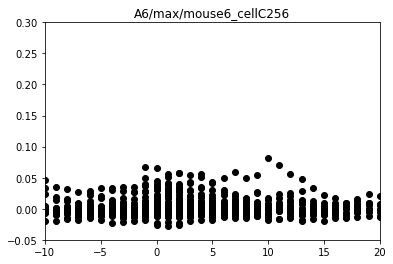

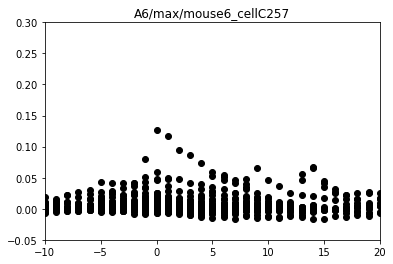

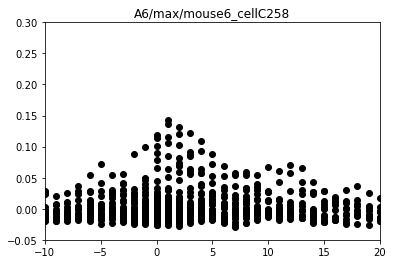

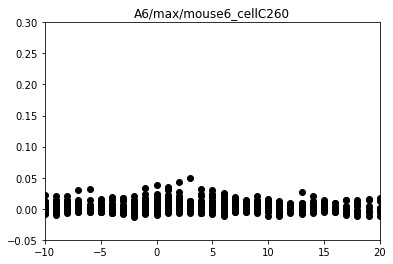

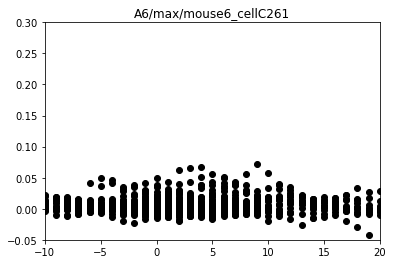

In [21]:
%matplotlib inline
for j in range(dfmax.columns.get_loc('C000'),dfmax.columns.get_loc('C261')+1):
    
    #for k in range(-2,2):

    #plt.scatter(dfmean['mconseq'],dfmean[dfmean.columns[j]],color='red')
    
    plt.scatter(dfmax['mconseq'],dfmax[dfmax.columns[j]],color='black')
    
    plt.xlim(-10,20)
    
    plt.ylim(-0.05,0.30)

    title_name='%s/max/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    plt.title(title_name)
    file_name=title_name+'.png'
    #plt.savefig(file_name)
    #plt.figure()
    plt.show()

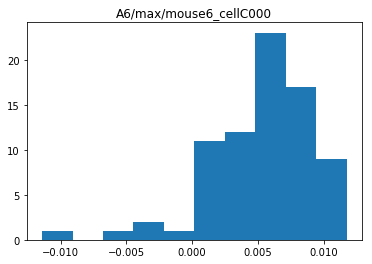

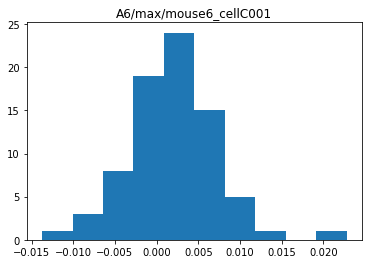

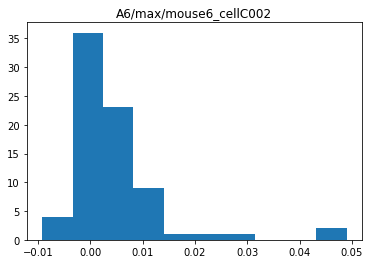

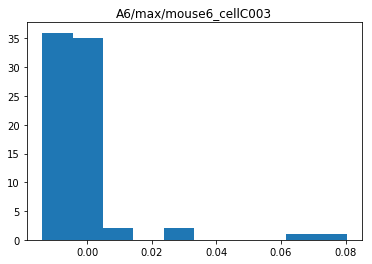

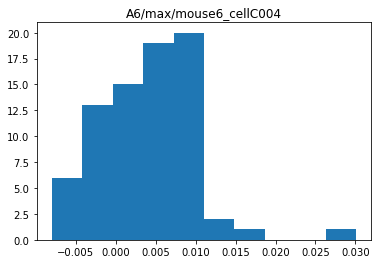

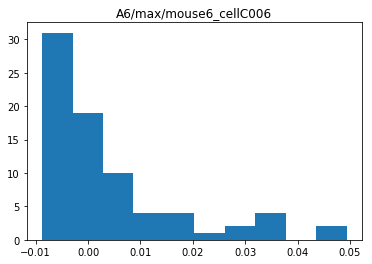

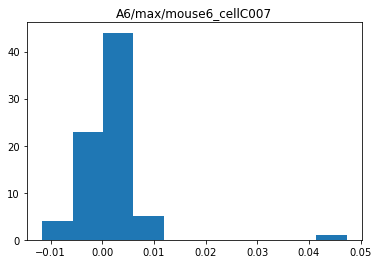

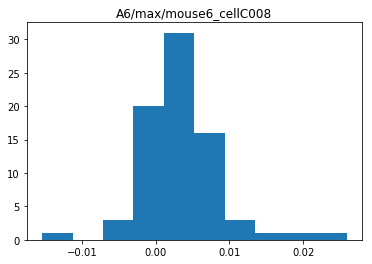

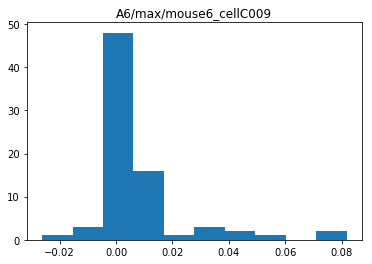

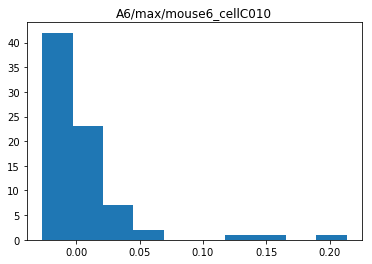

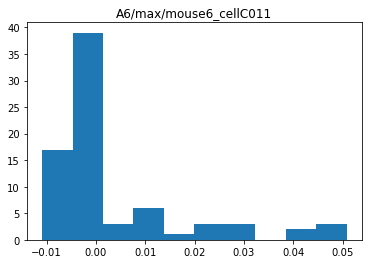

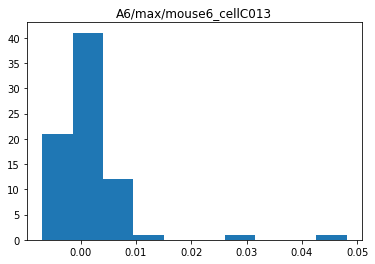

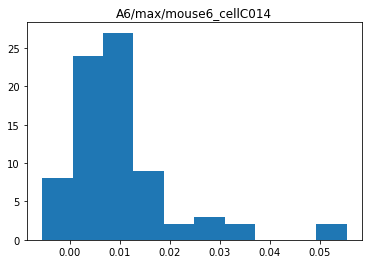

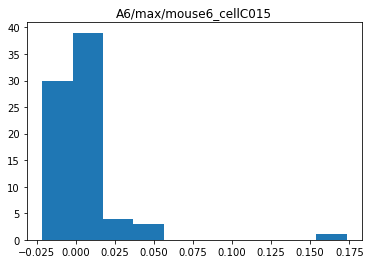

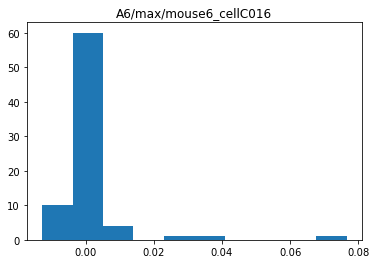

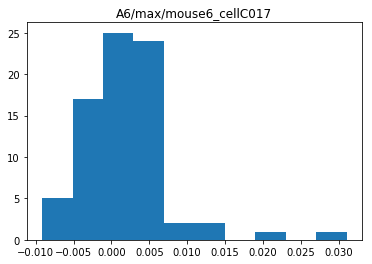

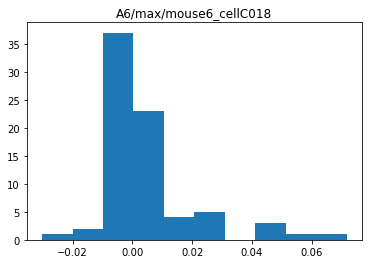

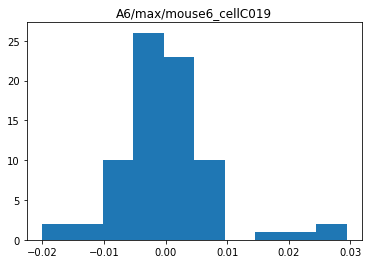

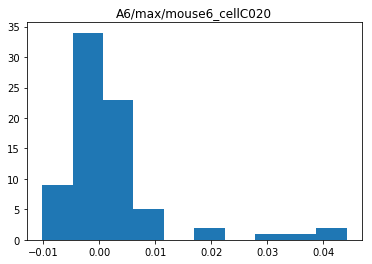

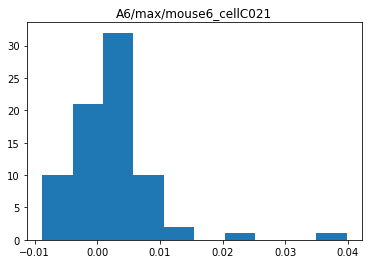

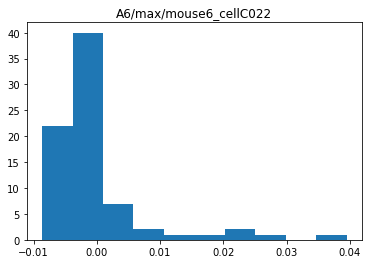

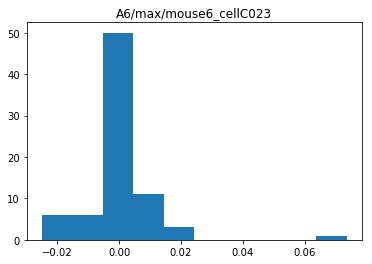

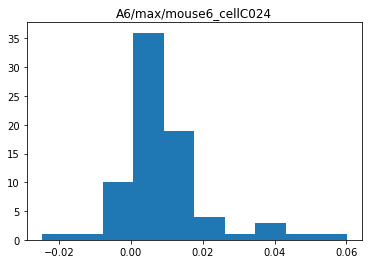

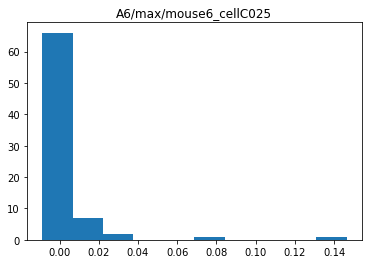

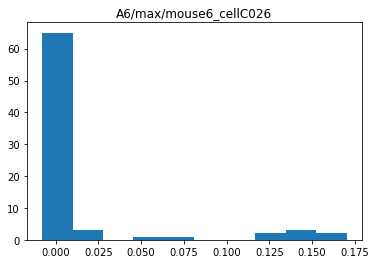

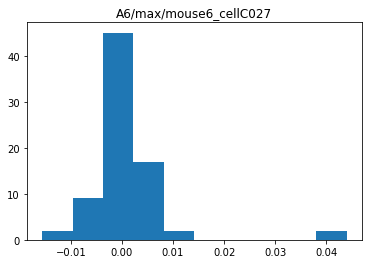

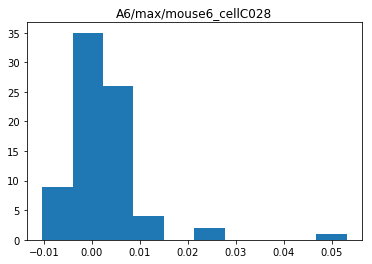

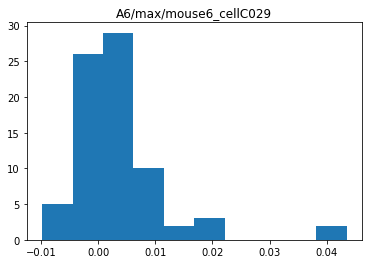

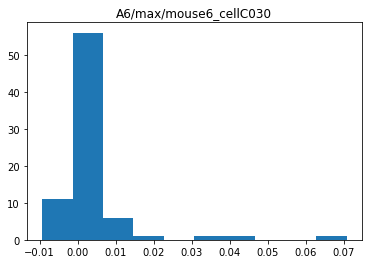

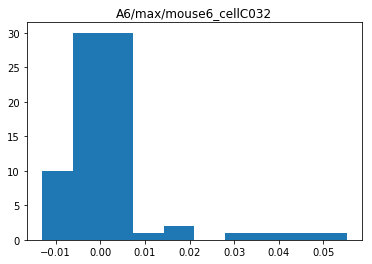

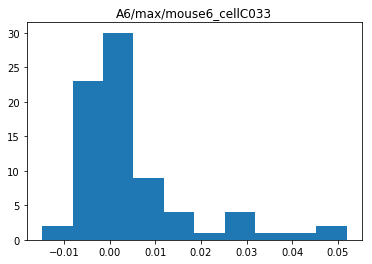

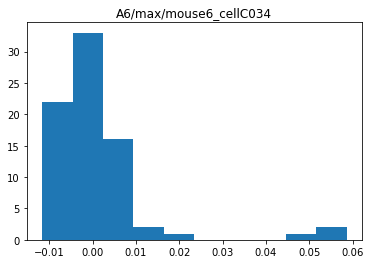

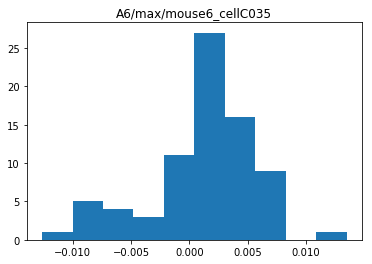

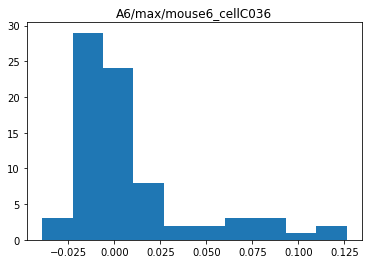

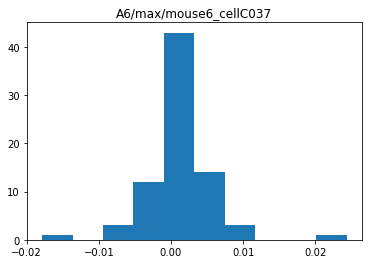

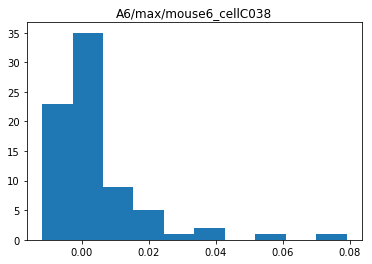

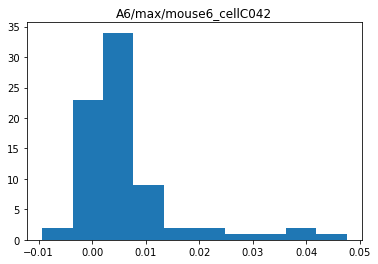

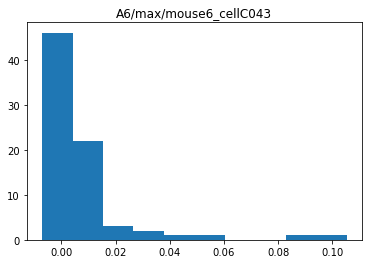

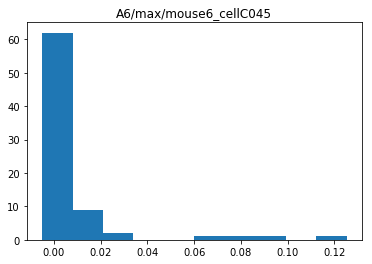

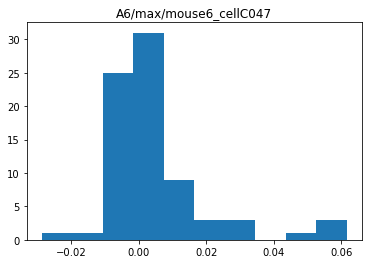

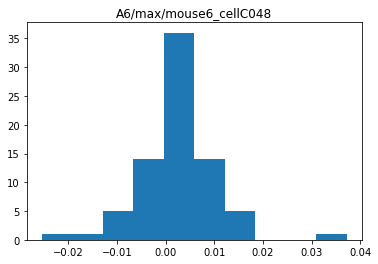

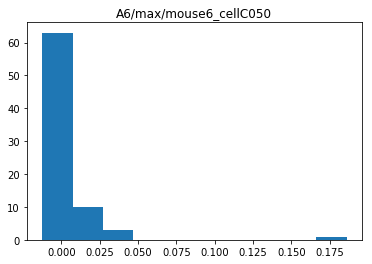

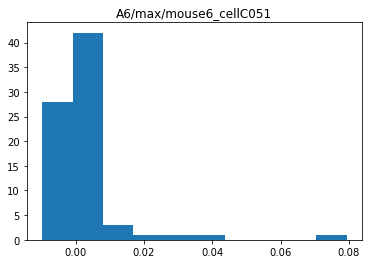

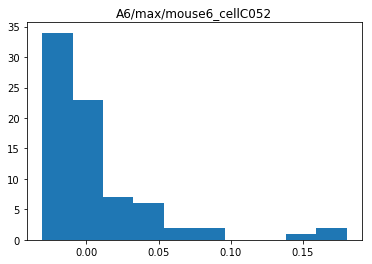

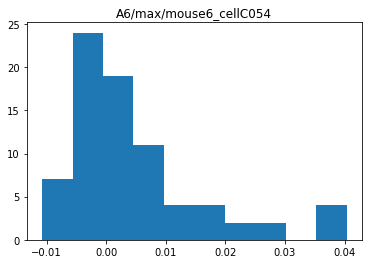

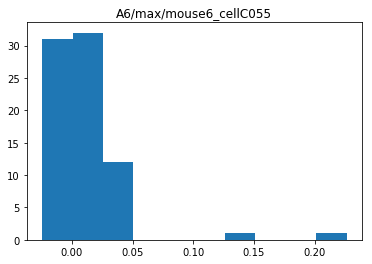

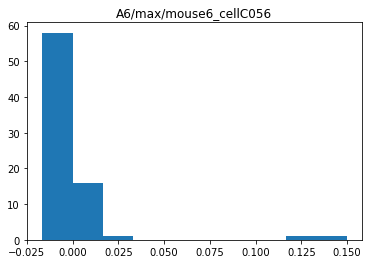

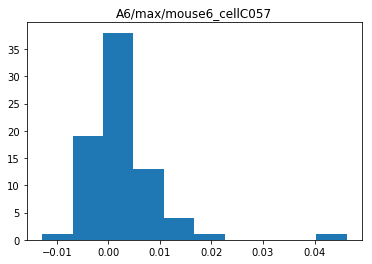

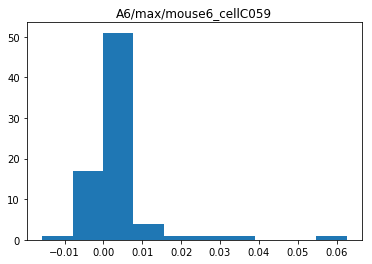

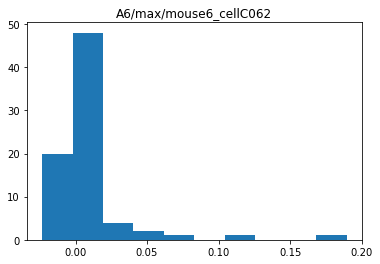

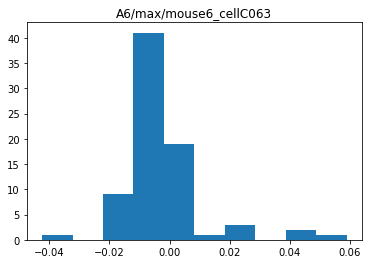

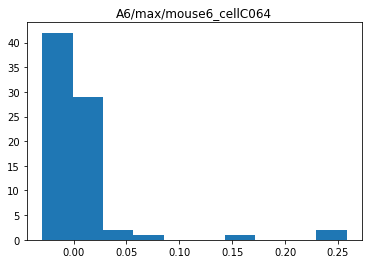

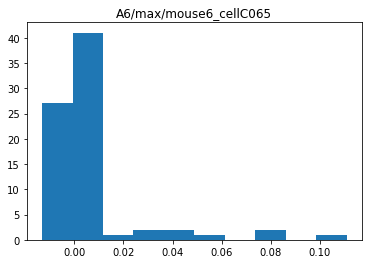

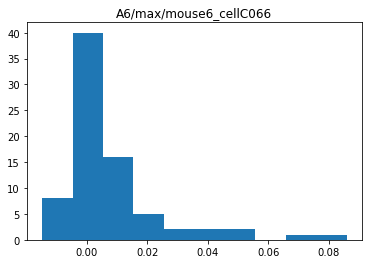

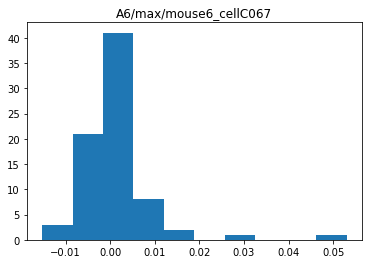

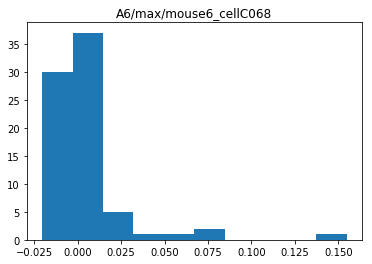

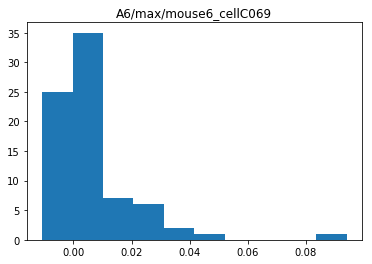

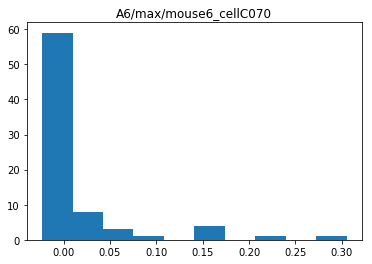

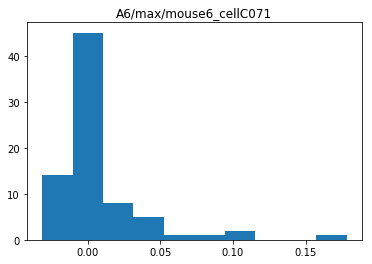

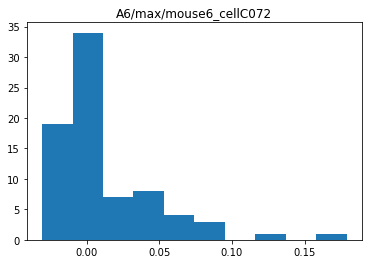

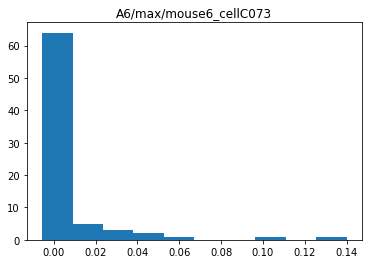

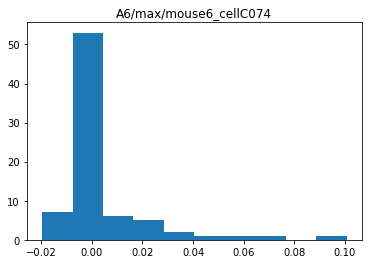

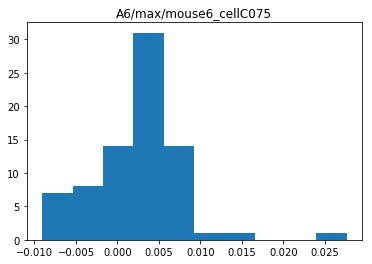

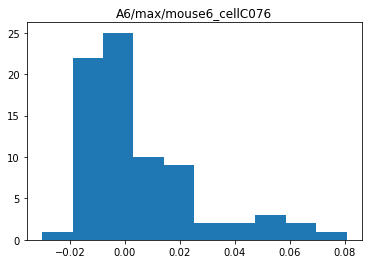

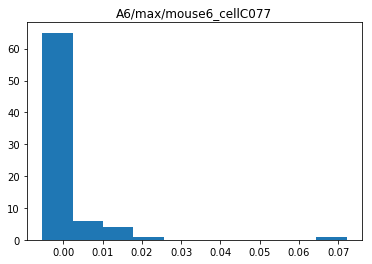

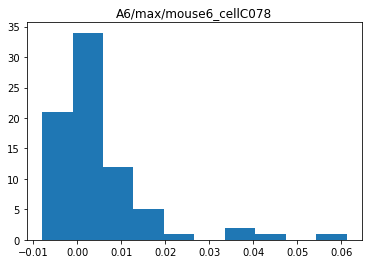

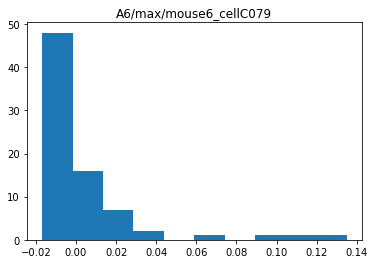

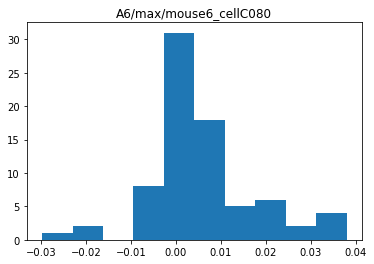

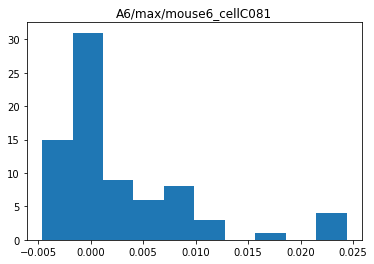

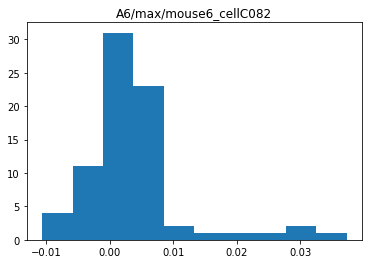

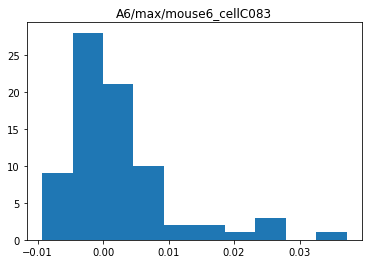

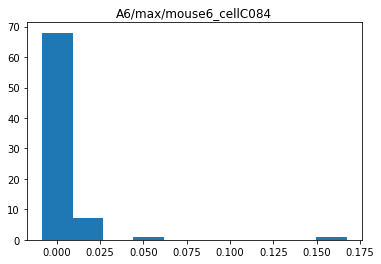

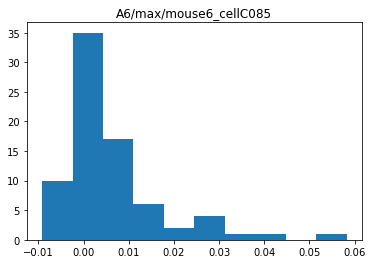

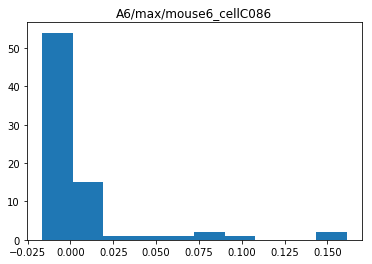

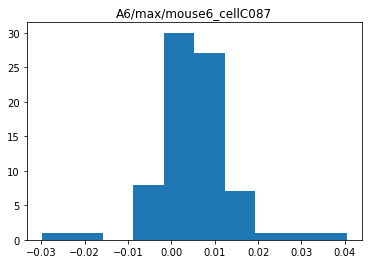

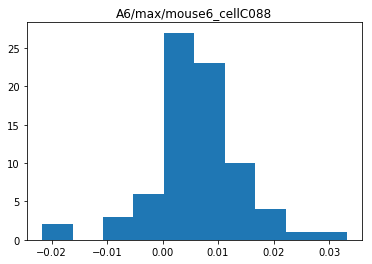

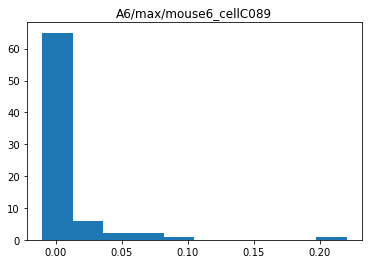

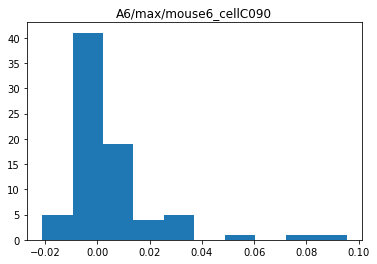

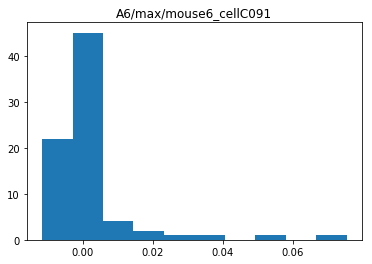

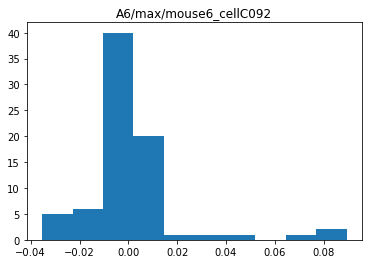

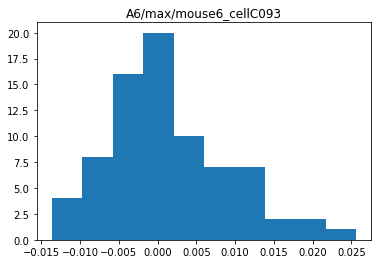

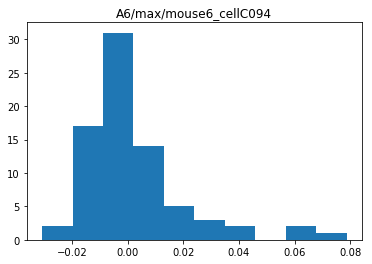

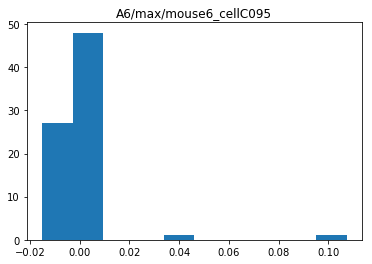

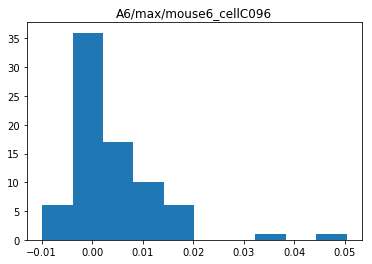

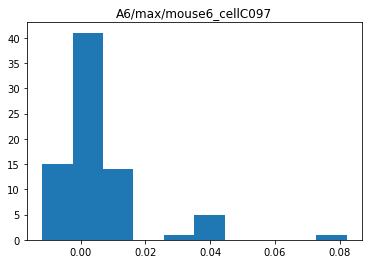

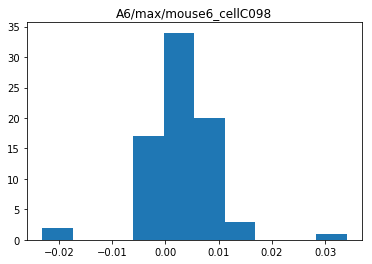

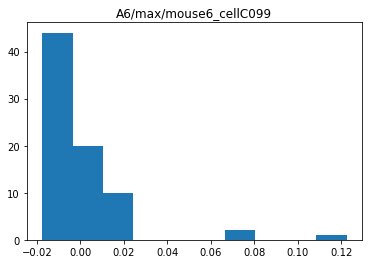

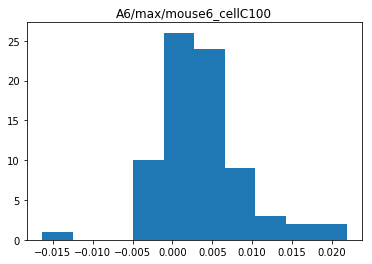

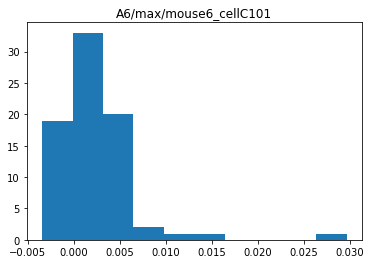

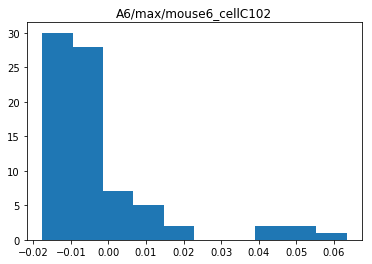

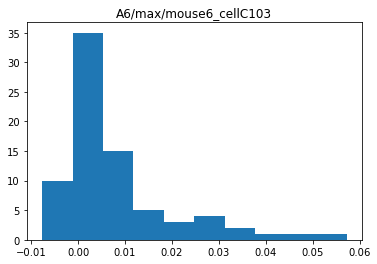

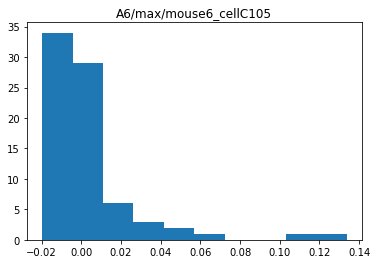

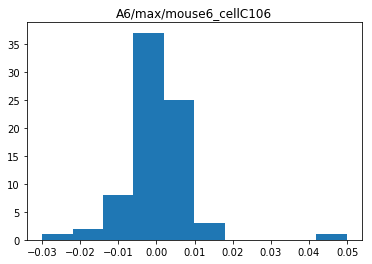

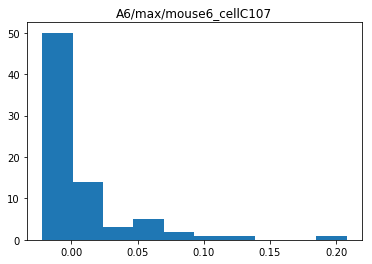

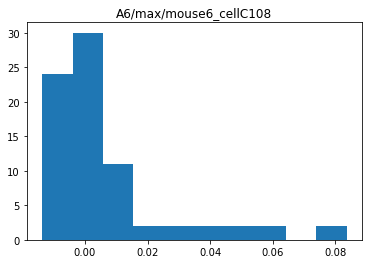

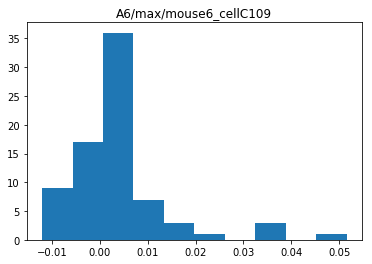

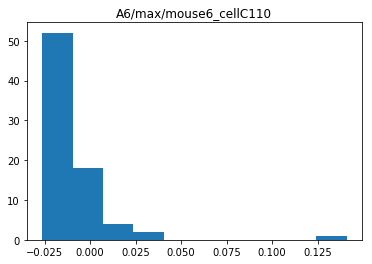

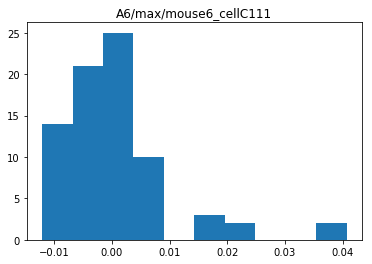

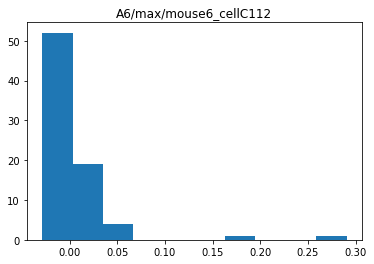

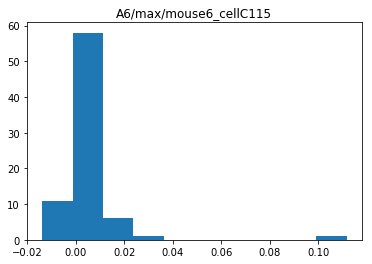

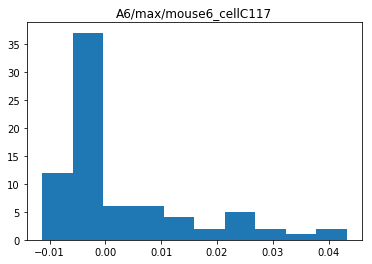

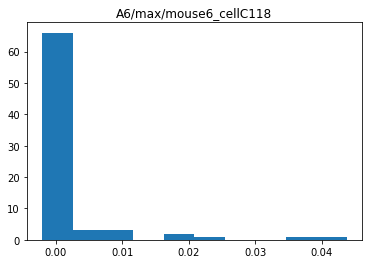

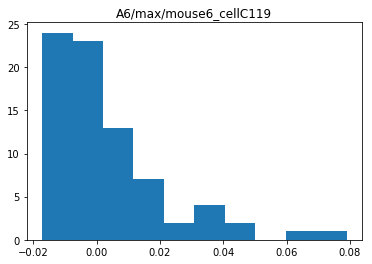

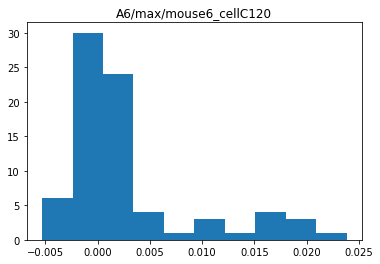

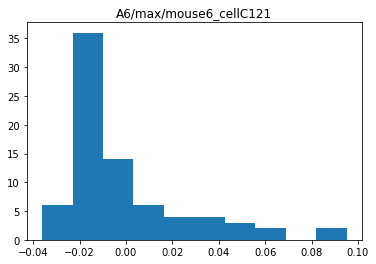

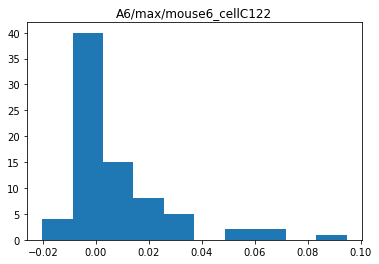

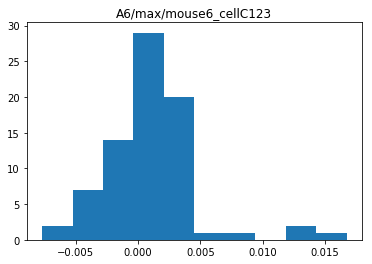

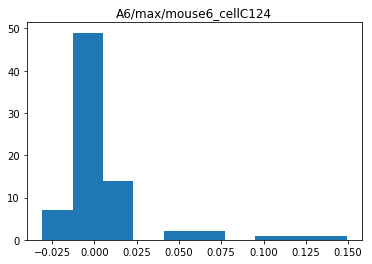

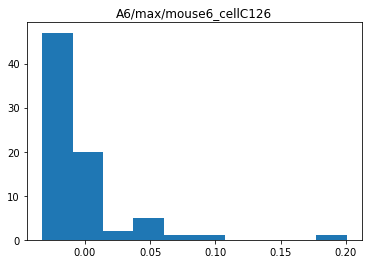

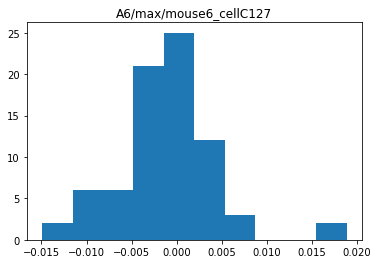

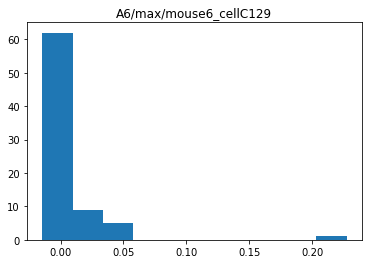

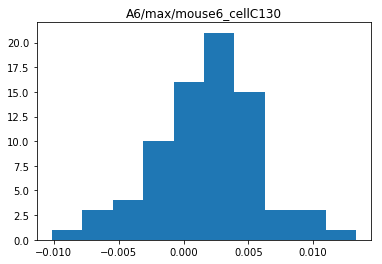

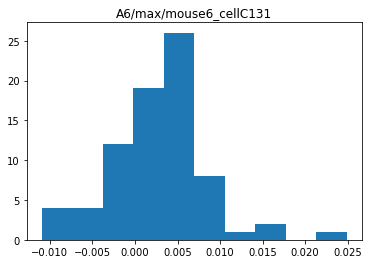

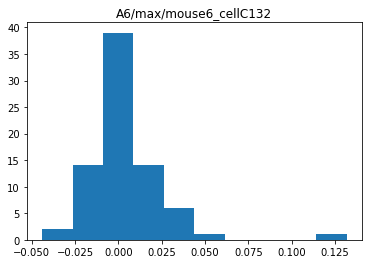

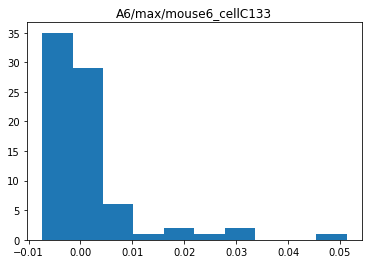

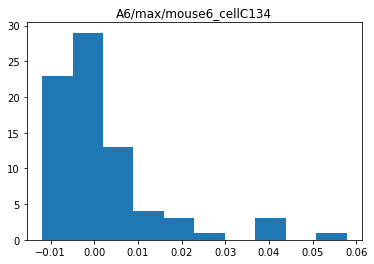

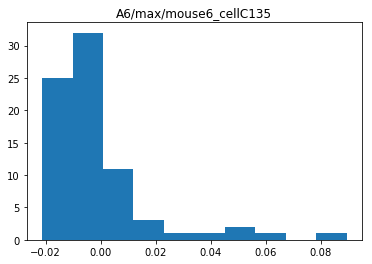

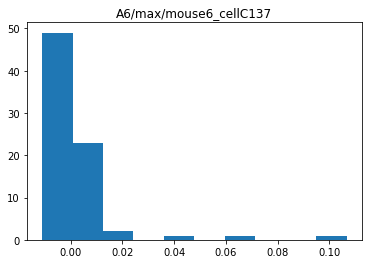

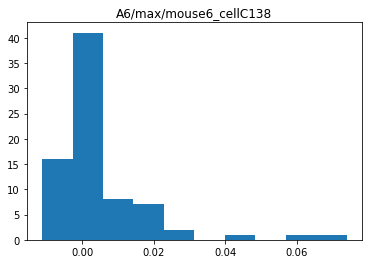

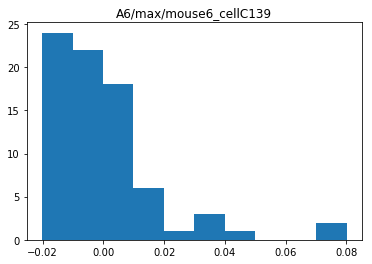

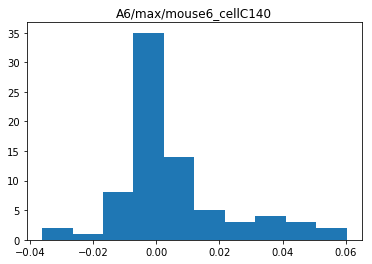

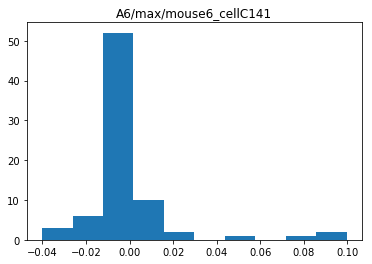

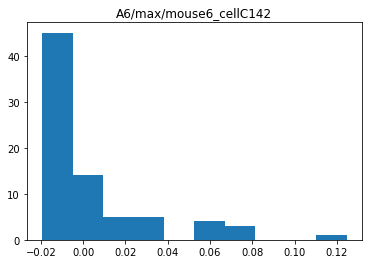

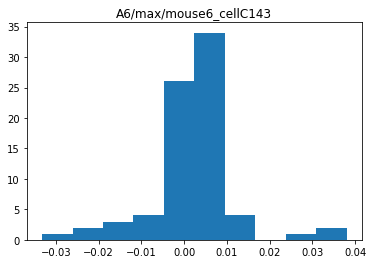

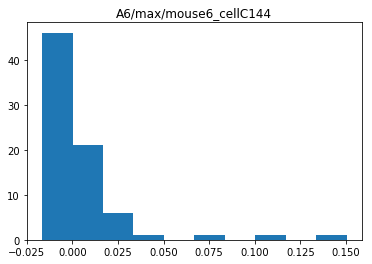

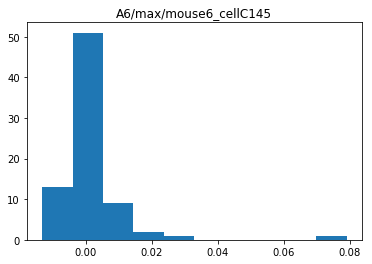

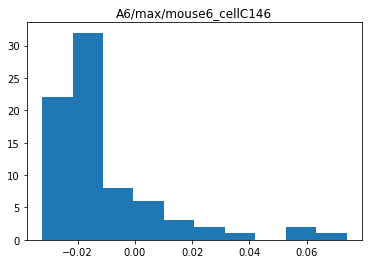

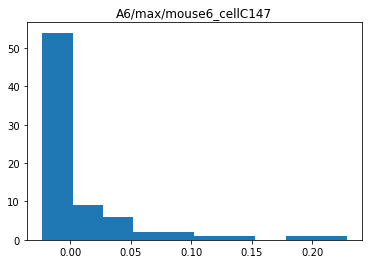

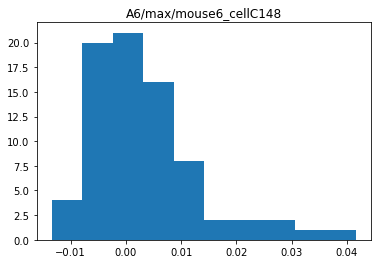

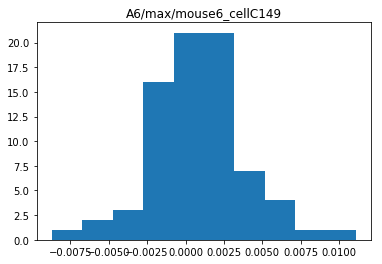

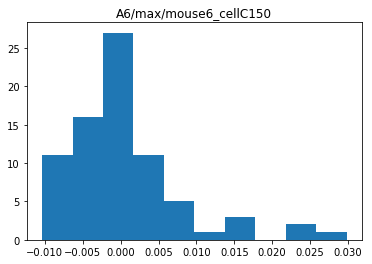

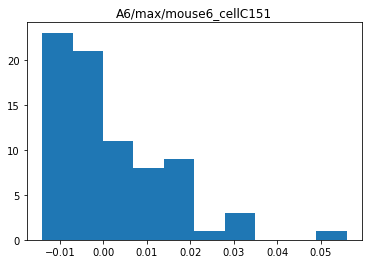

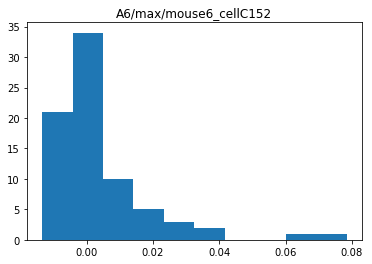

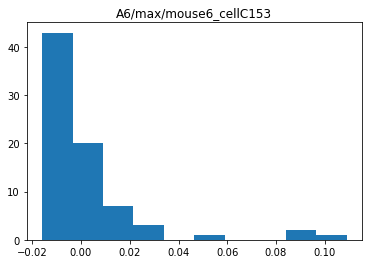

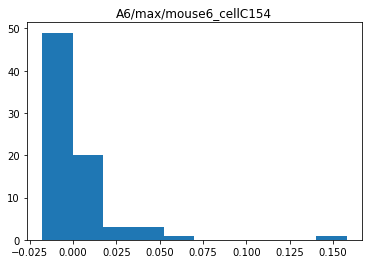

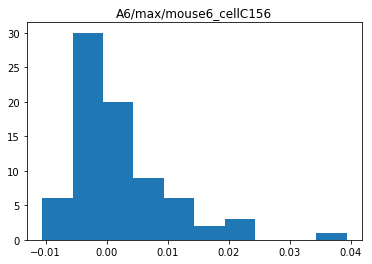

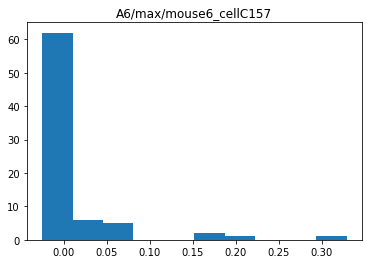

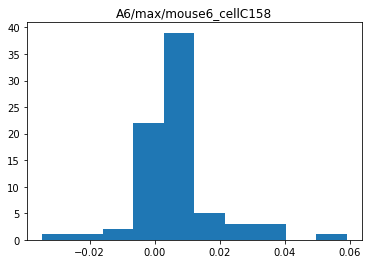

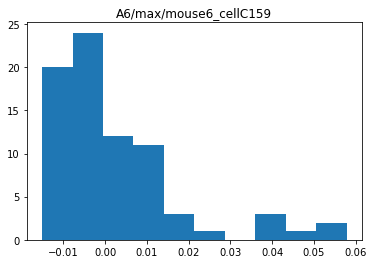

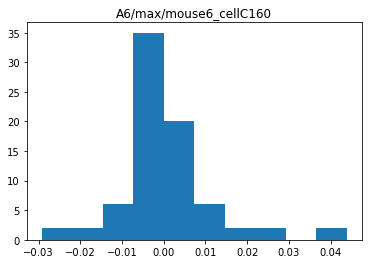

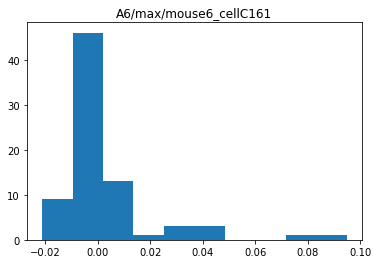

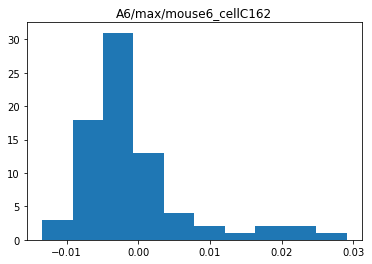

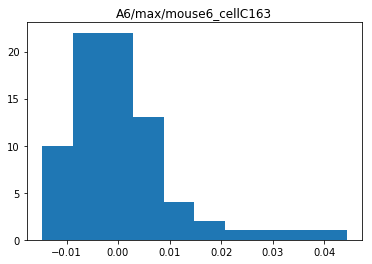

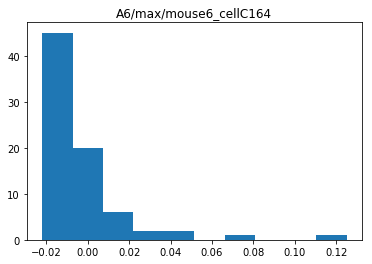

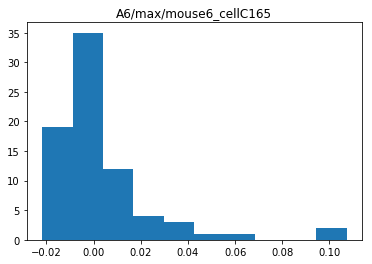

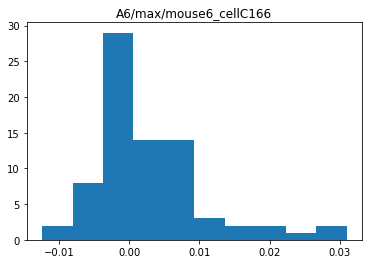

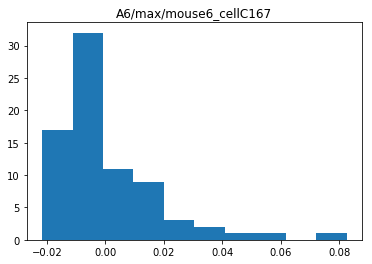

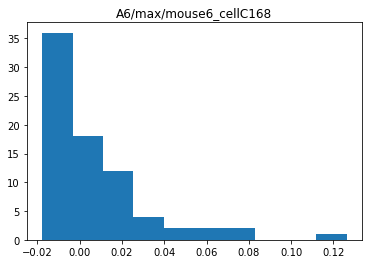

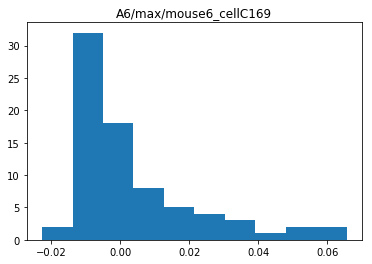

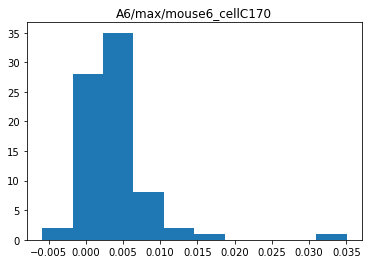

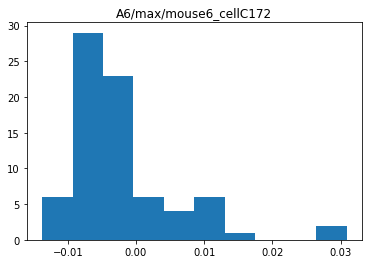

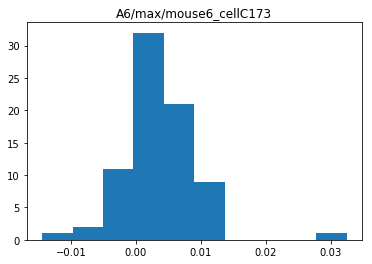

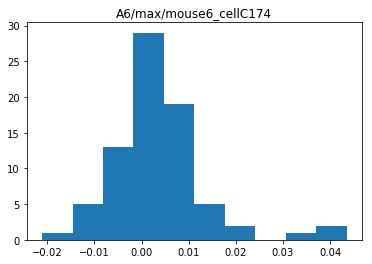

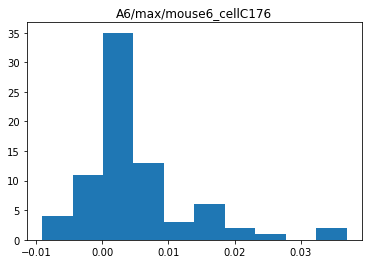

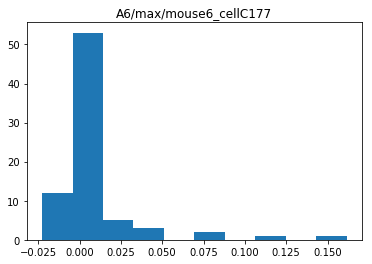

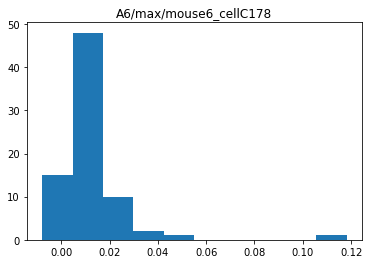

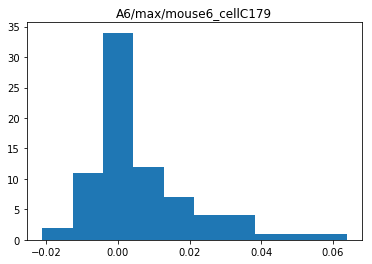

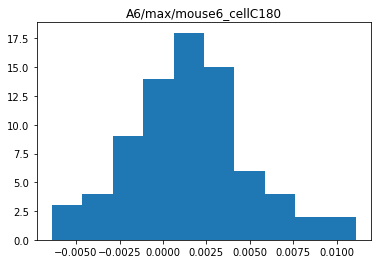

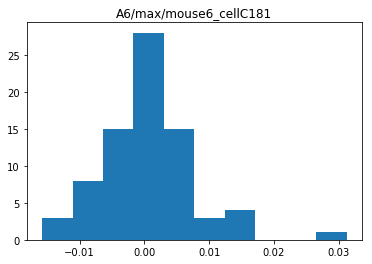

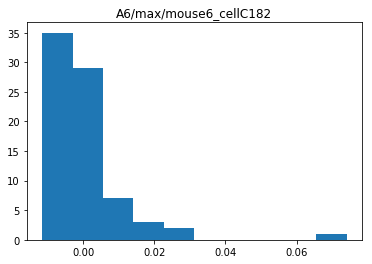

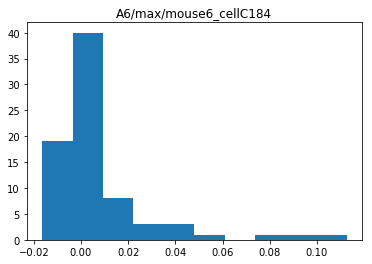

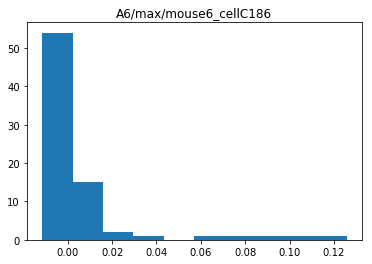

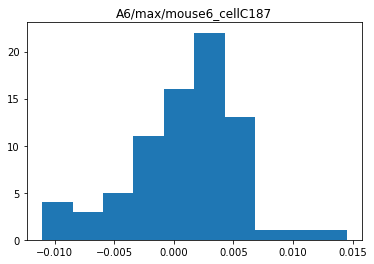

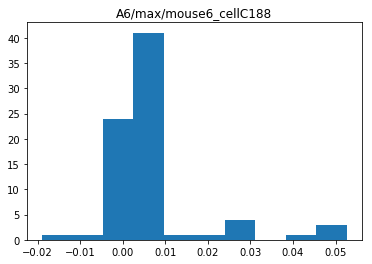

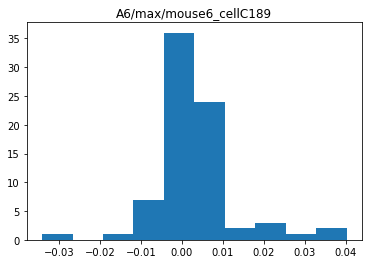

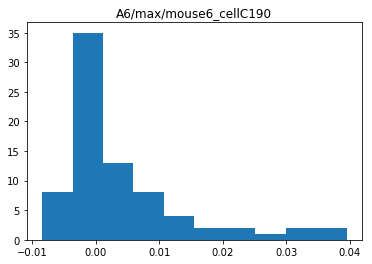

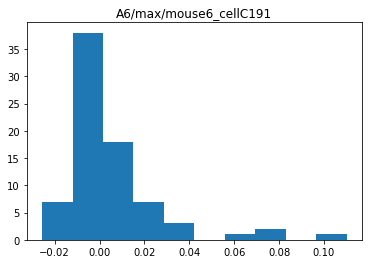

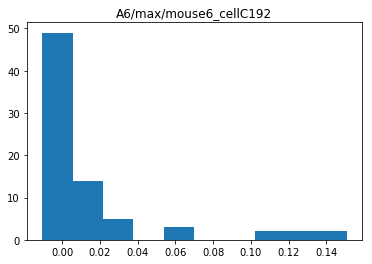

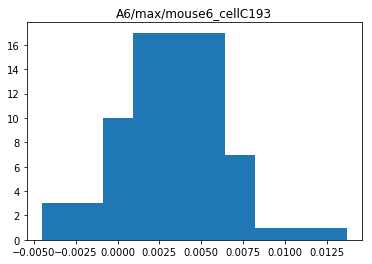

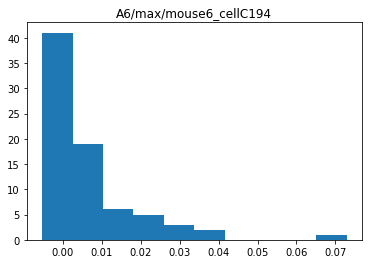

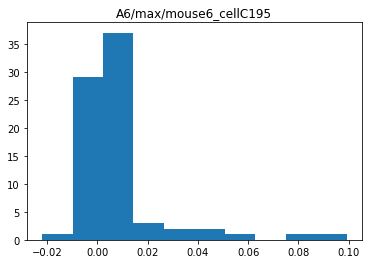

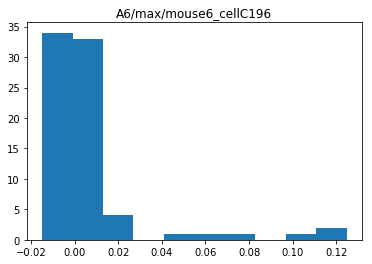

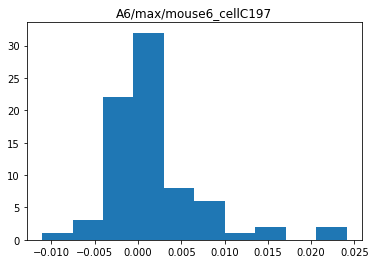

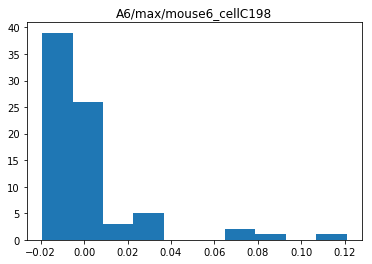

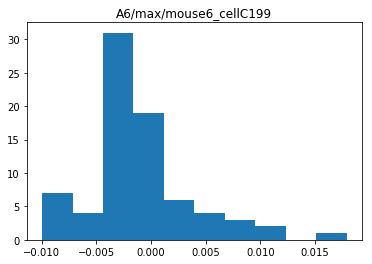

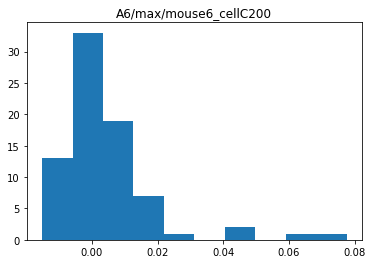

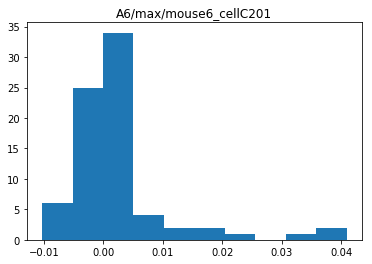

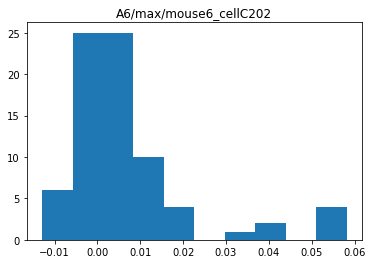

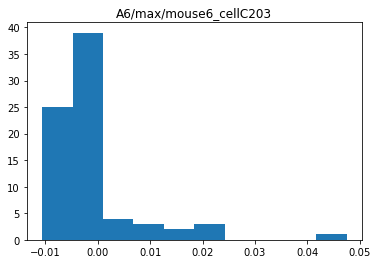

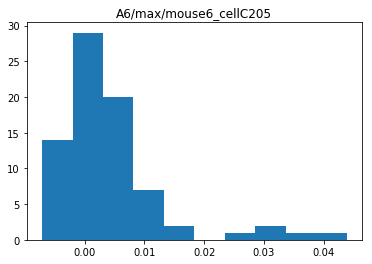

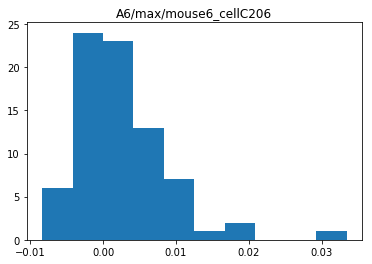

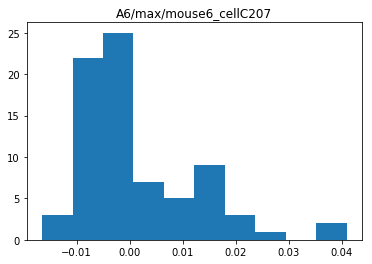

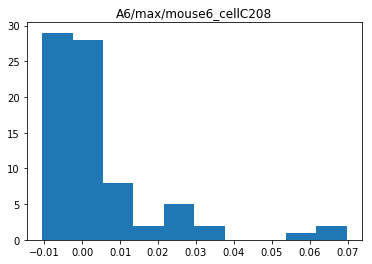

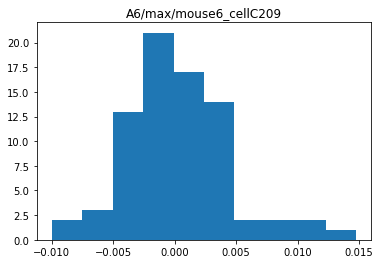

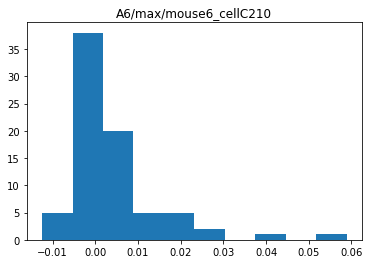

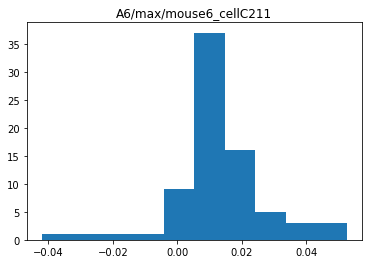

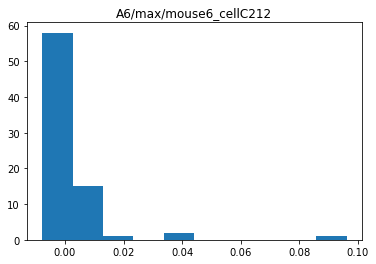

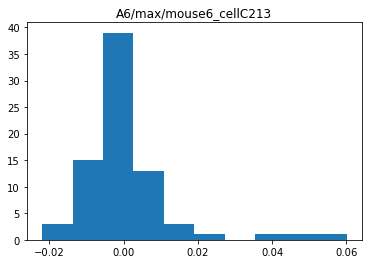

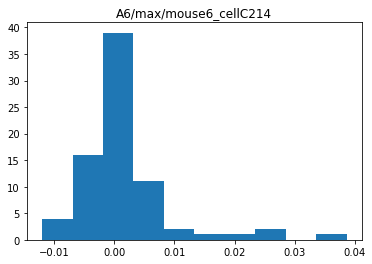

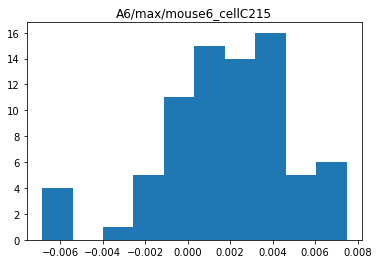

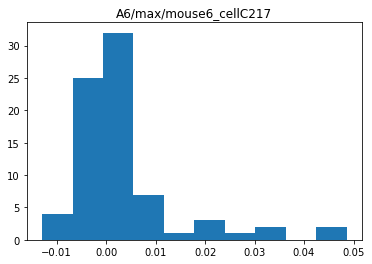

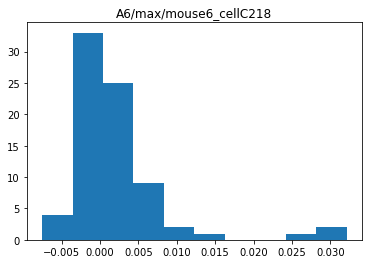

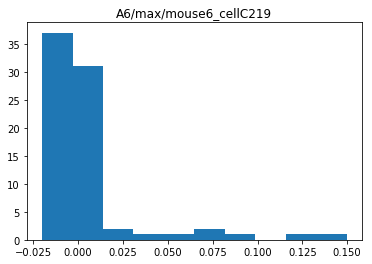

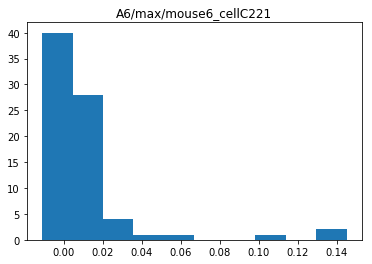

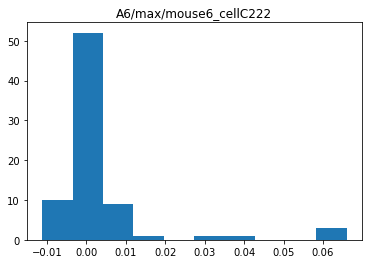

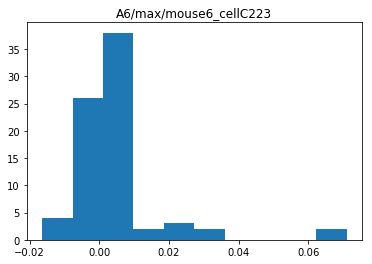

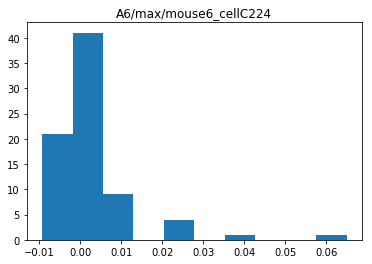

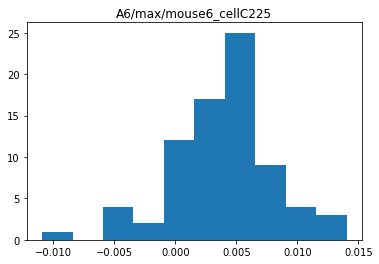

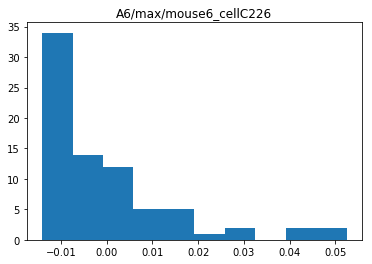

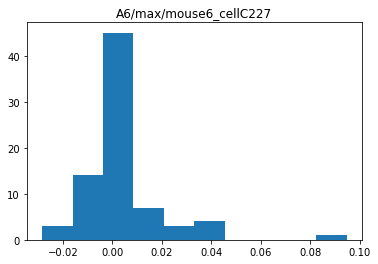

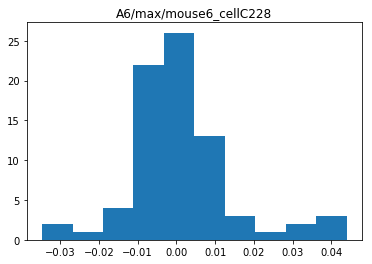

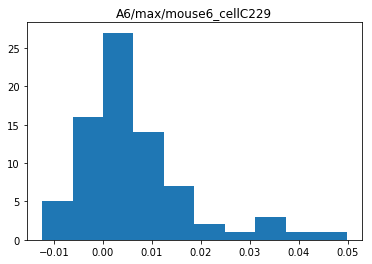

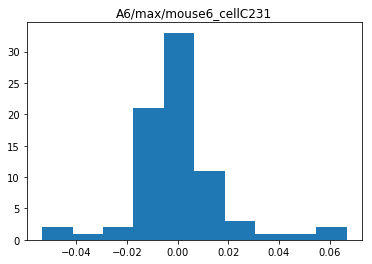

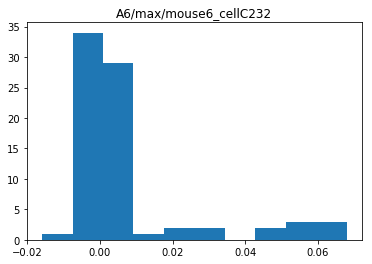

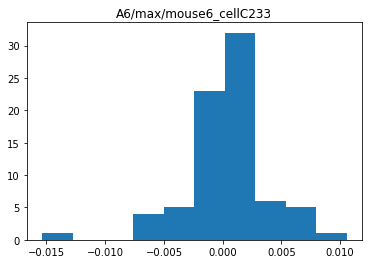

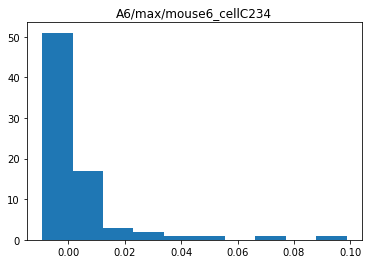

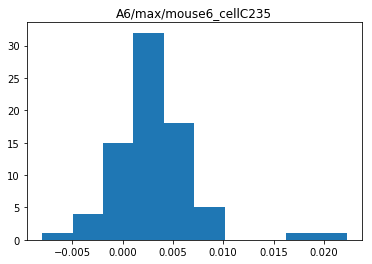

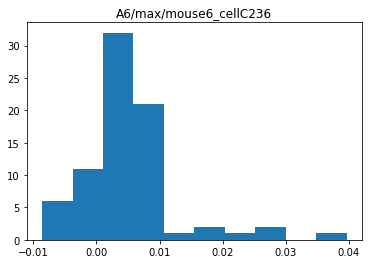

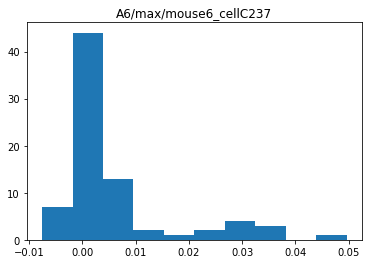

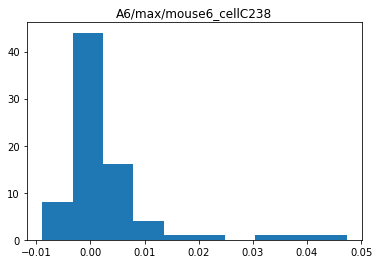

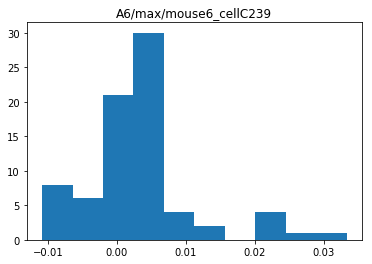

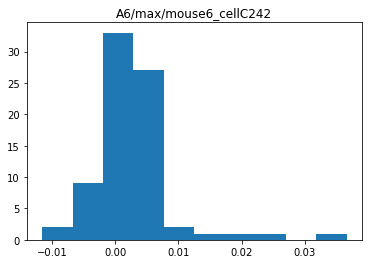

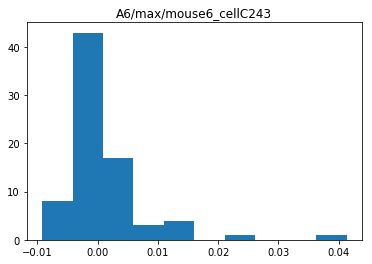

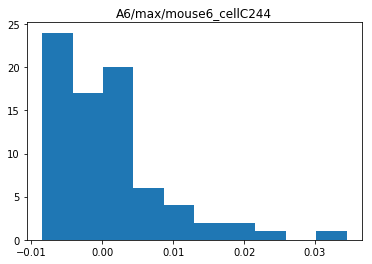

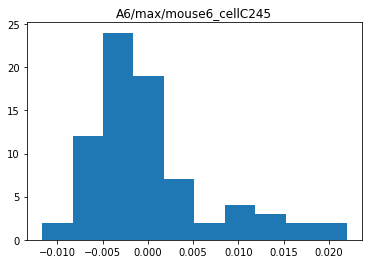

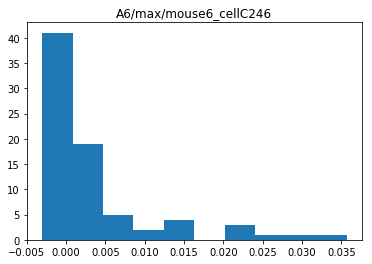

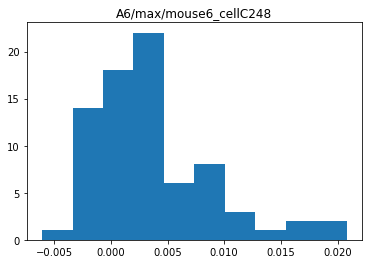

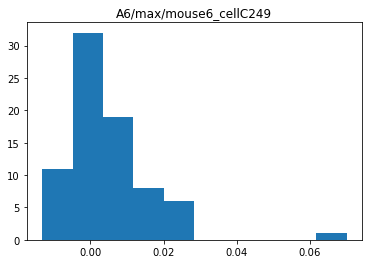

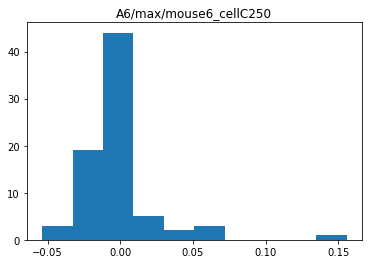

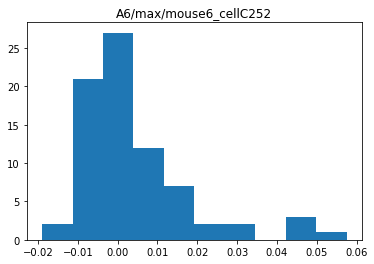

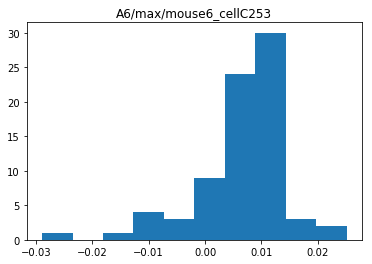

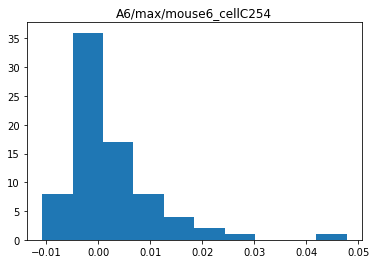

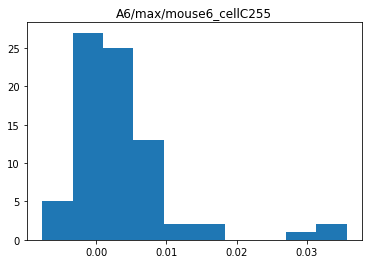

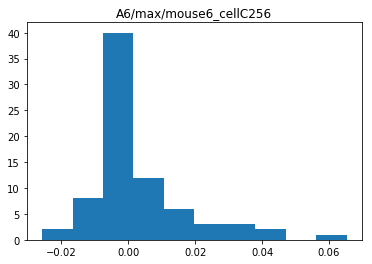

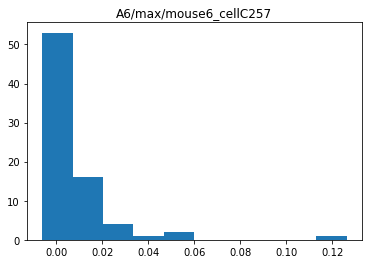

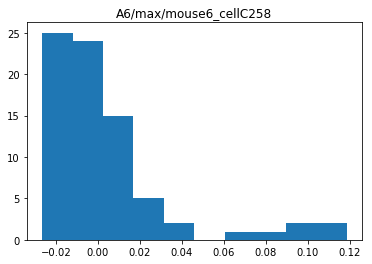

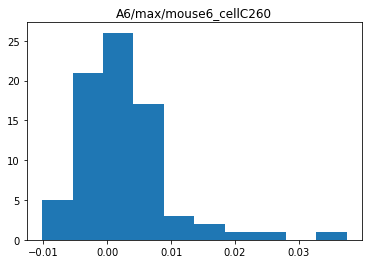

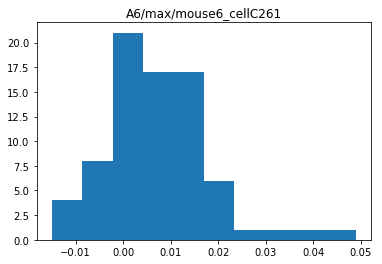

In [28]:
%matplotlib inline
    
for k in range(0,1):

    #plt.scatter(dfmean['mconseq'],dfmean[dfmean.columns[j]],color='red')
    
    dfmax_k=dfmax[dfmax['mconseq']==k]
    
    for j in range(dfmax.columns.get_loc('C000'),dfmax.columns.get_loc('C261')+1):
    
        plt.hist(dfmax_k[dfmax.columns[j]])
    
        title_name='%s/max/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
        plt.title(title_name)
        file_name=title_name+'.png'
        #plt.savefig(file_name)
        #plt.figure()
        plt.show()

In [ ]:
for j in range(dfmean.columns.get_loc('C000'),dfmean.columns.get_loc('C261')+1):

    plt.scatter(dfmean['mconseq'],dfmean[dfmean.columns[j]],color='red')
    
    #plt.scatter(dfmax['mconseq'],dfmax[dfmax.columns[j]],color='black')
    
    plt.xlim(-10,20)
    
    plt.ylim(-0.05,0.30)

    title_name='%s/mean/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    plt.title(title_name)
    file_name=title_name+'.png'
    #plt.savefig(file_name)
    plt.figure()
    

plt.show()

In [ ]:
dfmean_g=dfmean.groupby('mconseq')
dfmean_g_size=dfmean_g.size()
dfmean_g_mean=dfmean_g.mean()
dfmean_g_max=dfmean_g.max()
dfmean_g_std=dfmean_g.std()
dfmean_g_std

In [ ]:
dfmean_g_ste=pd.DataFrame(index=dfmean_g_std.index,columns=dfmean_g_std.columns)

for i in range(len(dfmean_g_ste.columns)):
    
    for j in range(len(dfmean_g_ste.index)):
        
        dfmean_g_ste.iloc[j,i]=dfmean_g_std.iloc[j,i]/math.sqrt(dfmean_g_size.iloc[j])

In [ ]:
dfmean_g_size

In [ ]:
dfmean_g_ste

In [ ]:
for j in range(dfmean_g_mean.columns.get_loc('C000'),dfmean_g_mean.columns.get_loc('C261')+1):
    
    plt.plot(dfmean_g_mean.index,dfmean_g_mean[dfmean_g_mean.columns[j]],color='red')
    
    #plt.errorbar(dfmean_g_mean.index,dfmean_g_mean[dfmean_g_mean.columns[j]],yerr=dfmean_g_std[dfmean_g_std.columns[j]],fmt='ro',ecolor='blue')
    
    plt.errorbar(dfmean_g_mean.index,dfmean_g_mean[dfmean_g_mean.columns[j]],yerr=dfmean_g_ste[dfmean_g_ste.columns[j]],fmt='ro',ecolor='blue')
    
    #plt.plot(dfmean_g_max.index,dfmean_g_max[dfmean_g_max.columns[j]],color='black')
    
    plt.xlim(-10,20)
    
    plt.ylim(-0.05,0.10)
    
    
    title_name='%s/statmean/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    plt.title(title_name)
    file_name=title_name+'.png'
    plt.savefig(file_name)
    plt.figure()
    #plt.show()

In [ ]:
dfmax_g=dfmax.groupby('mconseq')
dfmax_g_size=dfmax_g.size()
dfmax_g_mean=dfmax_g.mean()
dfmax_g_max=dfmax_g.max()
dfmax_g_std=dfmax_g.std()

In [ ]:
dfmax_g_ste=pd.DataFrame(index=dfmax_g_std.index,columns=dfmax_g_std.columns)

for i in range(len(dfmax_g_ste.columns)):
    
    for j in range(len(dfmax_g_ste.index)):
        
        dfmax_g_ste.iloc[j,i]=dfmax_g_std.iloc[j,i]/math.sqrt(dfmax_g_size.iloc[j])

In [ ]:
for j in range(dfmax_g_mean.columns.get_loc('C000'),dfmax_g_mean.columns.get_loc('C261')+1):
    
    plt.plot(dfmax_g_mean.index,dfmax_g_mean[dfmax_g_mean.columns[j]],color='red')
    
    #plt.errorbar(dfmean_g_mean.index,dfmean_g_mean[dfmean_g_mean.columns[j]],yerr=dfmean_g_std[dfmean_g_std.columns[j]],fmt='ro',ecolor='blue')
    
    plt.errorbar(dfmax_g_mean.index,dfmax_g_mean[dfmax_g_mean.columns[j]],yerr=dfmax_g_ste[dfmax_g_ste.columns[j]],fmt='ro',ecolor='blue')
    
    #plt.plot(dfmean_g_max.index,dfmean_g_max[dfmean_g_max.columns[j]],color='black')
    
    plt.xlim(-10,20)
    
    plt.ylim(-0.05,0.10)
    
    
    title_name='%s/statmax/mouse%s_cell%s' % (phase,mouse,dfmean.columns[j])
    plt.title(title_name)
    file_name=title_name+'.png'
    plt.savefig(file_name)
    plt.figure()
    #plt.show()